In [1]:
import os
import math
import copy

import numpy as np
import pandas as pd
import platereadertools as prt

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib import rc

rc('text',usetex=False)

In [2]:
# Import Data from the plate readeer experiment we ran on July 7th 2023. This data represents 1 replicate of 80 out of 96
# members of the library as well as MGz1 pATdCRxL1C, MGz1 pATdCRxL1C pEYF1K, and MGz1 Wild Type. The plate map can be found 
# in the p2x11 benchling notebook (https://benchling.com/aztaylor/f/lib_zcNJTcZv-microbiome-persistence-control-p2/etr_dWwaZ9zW-p2x11-gfp-guide-rna-library-/edit)
# specifically the plate layout is Well11.

data0mM, time0mM = prt.Organize('../Data/Plate Reader Experiments/p2x11_80memberlibrary0mMIPTG20230712.txt', 8, 12, 18, 3/60,)
data1mM, time1mM = prt.Organize('../Data/Plate Reader Experiments/p2x11_80memberlib_1mMIPTG20230712.txt', 8, 12, 18, 3/60)
data10mM, time10mM = prt.Organize('../Data/Plate Reader Experiments/p2x11_80memberlib_10mMIPTG20230712.txt', 8, 12, 18, 3/60)

In [3]:
reads = list(data0mM.keys())
print(reads)

['600', 'GFP75:480,510']


In [4]:
#need to swap rows F and G due to a mistake in making the plate.
for read in reads:
    data0mM[read][(5,6),:,:] = data0mM[read][(6,5),:,:]
    data1mM[read][(5,6),:,:] = data1mM[read][(6,5),:,:]
    data10mM[read][(5,6),:,:] = data10mM[read][(6,5),:,:]

In [5]:
# Blank by subtracting the blank wells H1-H2 and H5-H12. Also adds the associated error calculated by tge standard deviation.
data_blanked_l = [{}, {}, {}]
for read in reads:  
    for i, data in enumerate([data0mM, data1mM, data10mM]):
        data_blanked_l[i][read] = data[read] - np.ones(data[read].shape)*np.mean(data[read][7,1:,:])
        data_blanked_l[i][read+'_err'] = np.ones(data[read].shape)*np.std(data[read][7,1:,:])
                    


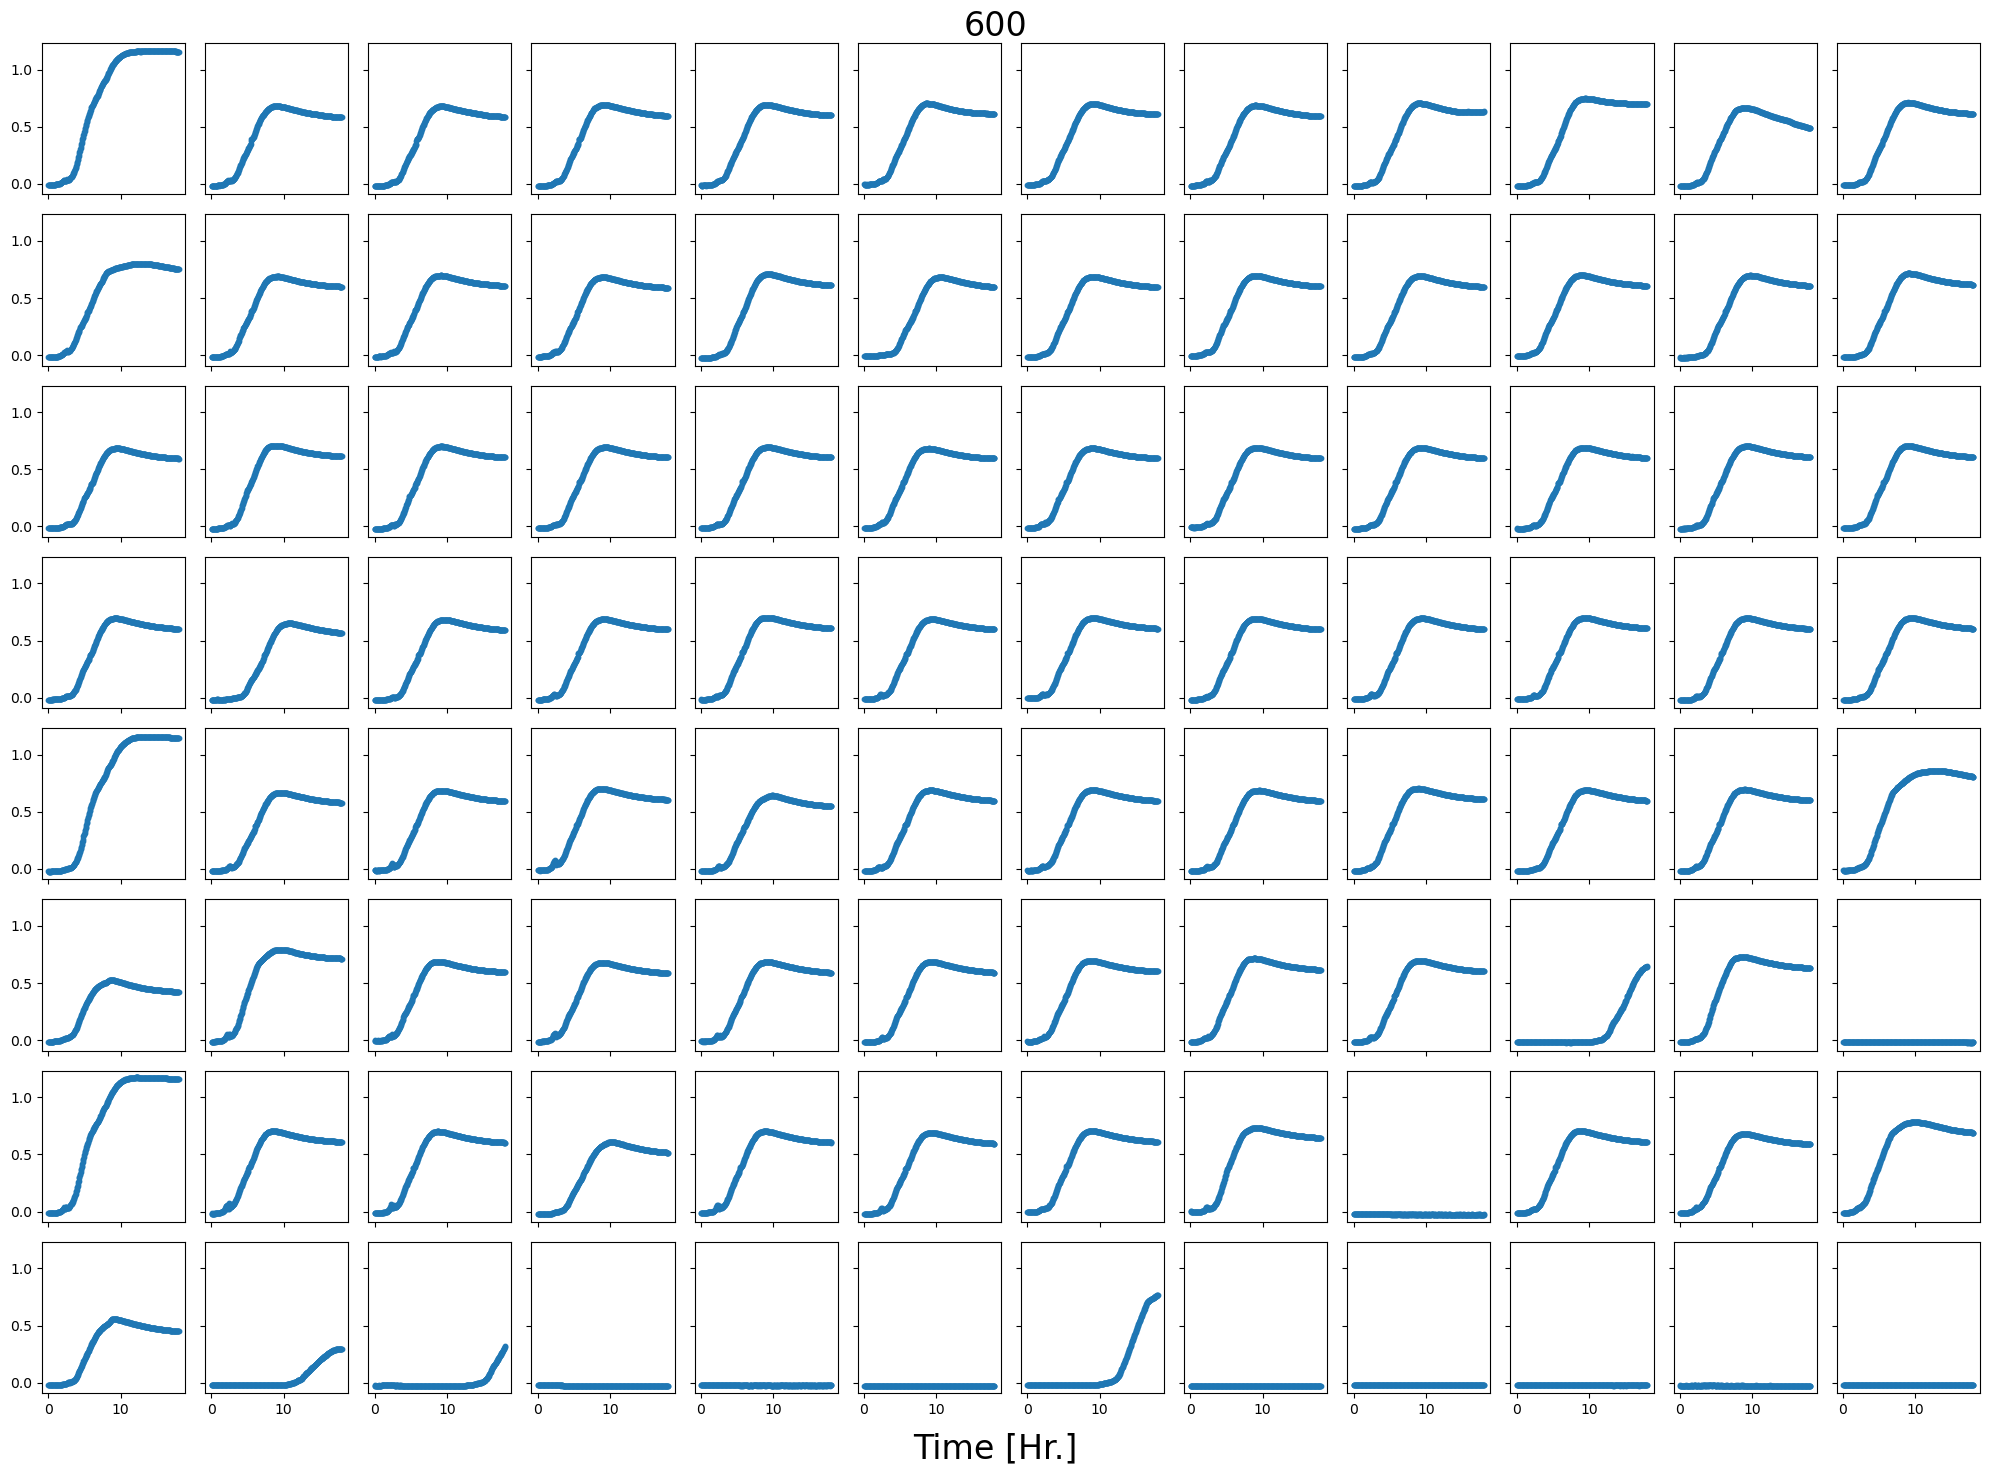

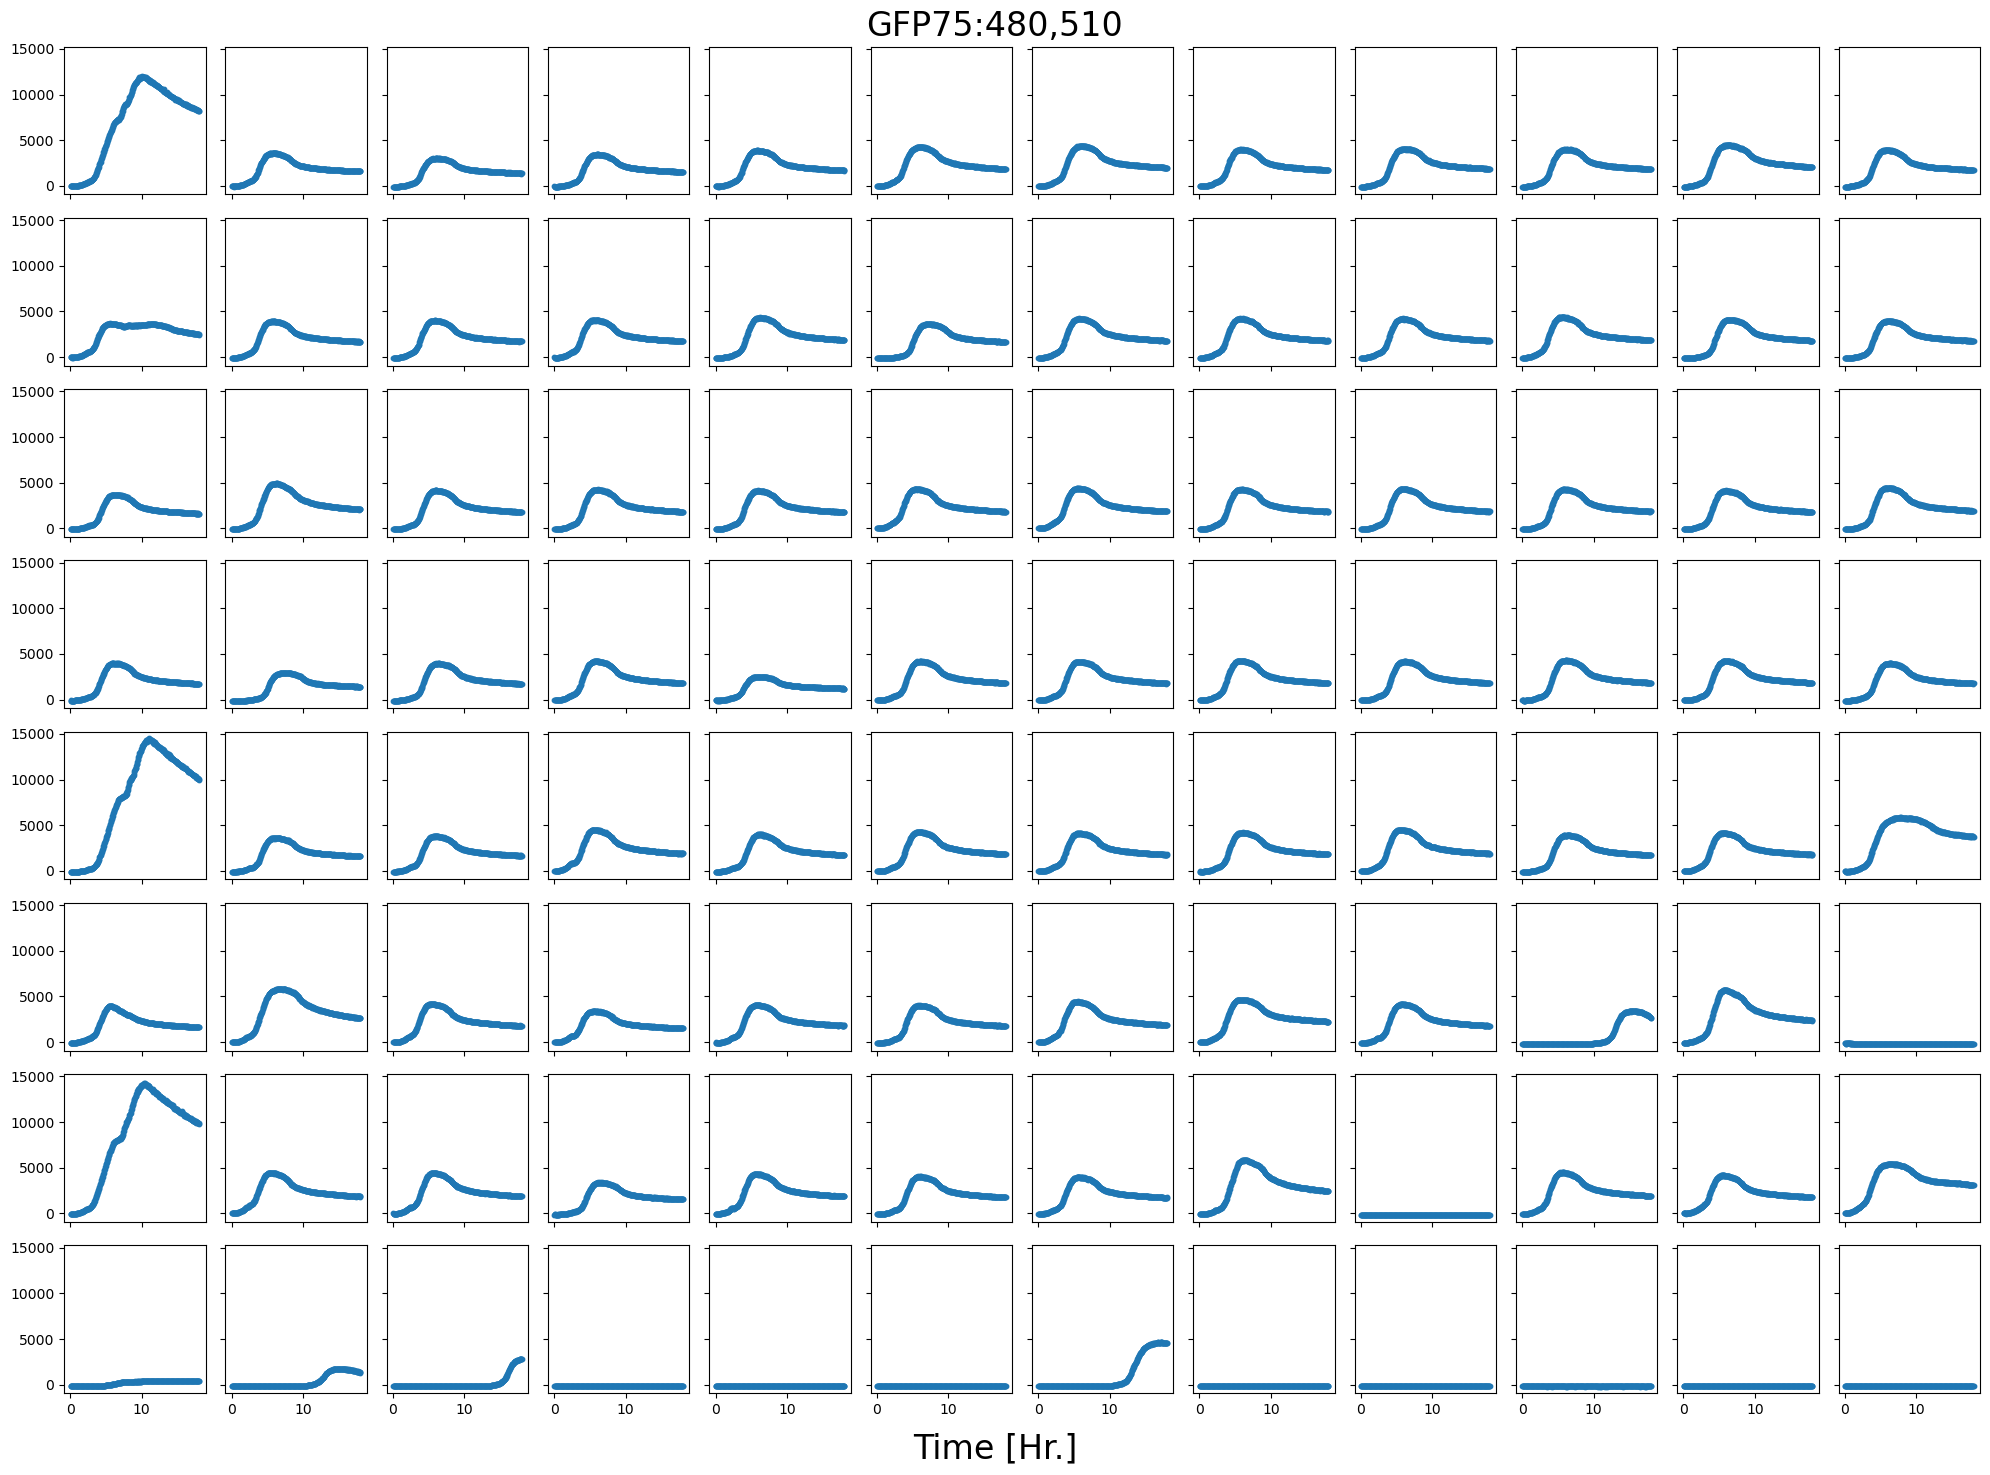

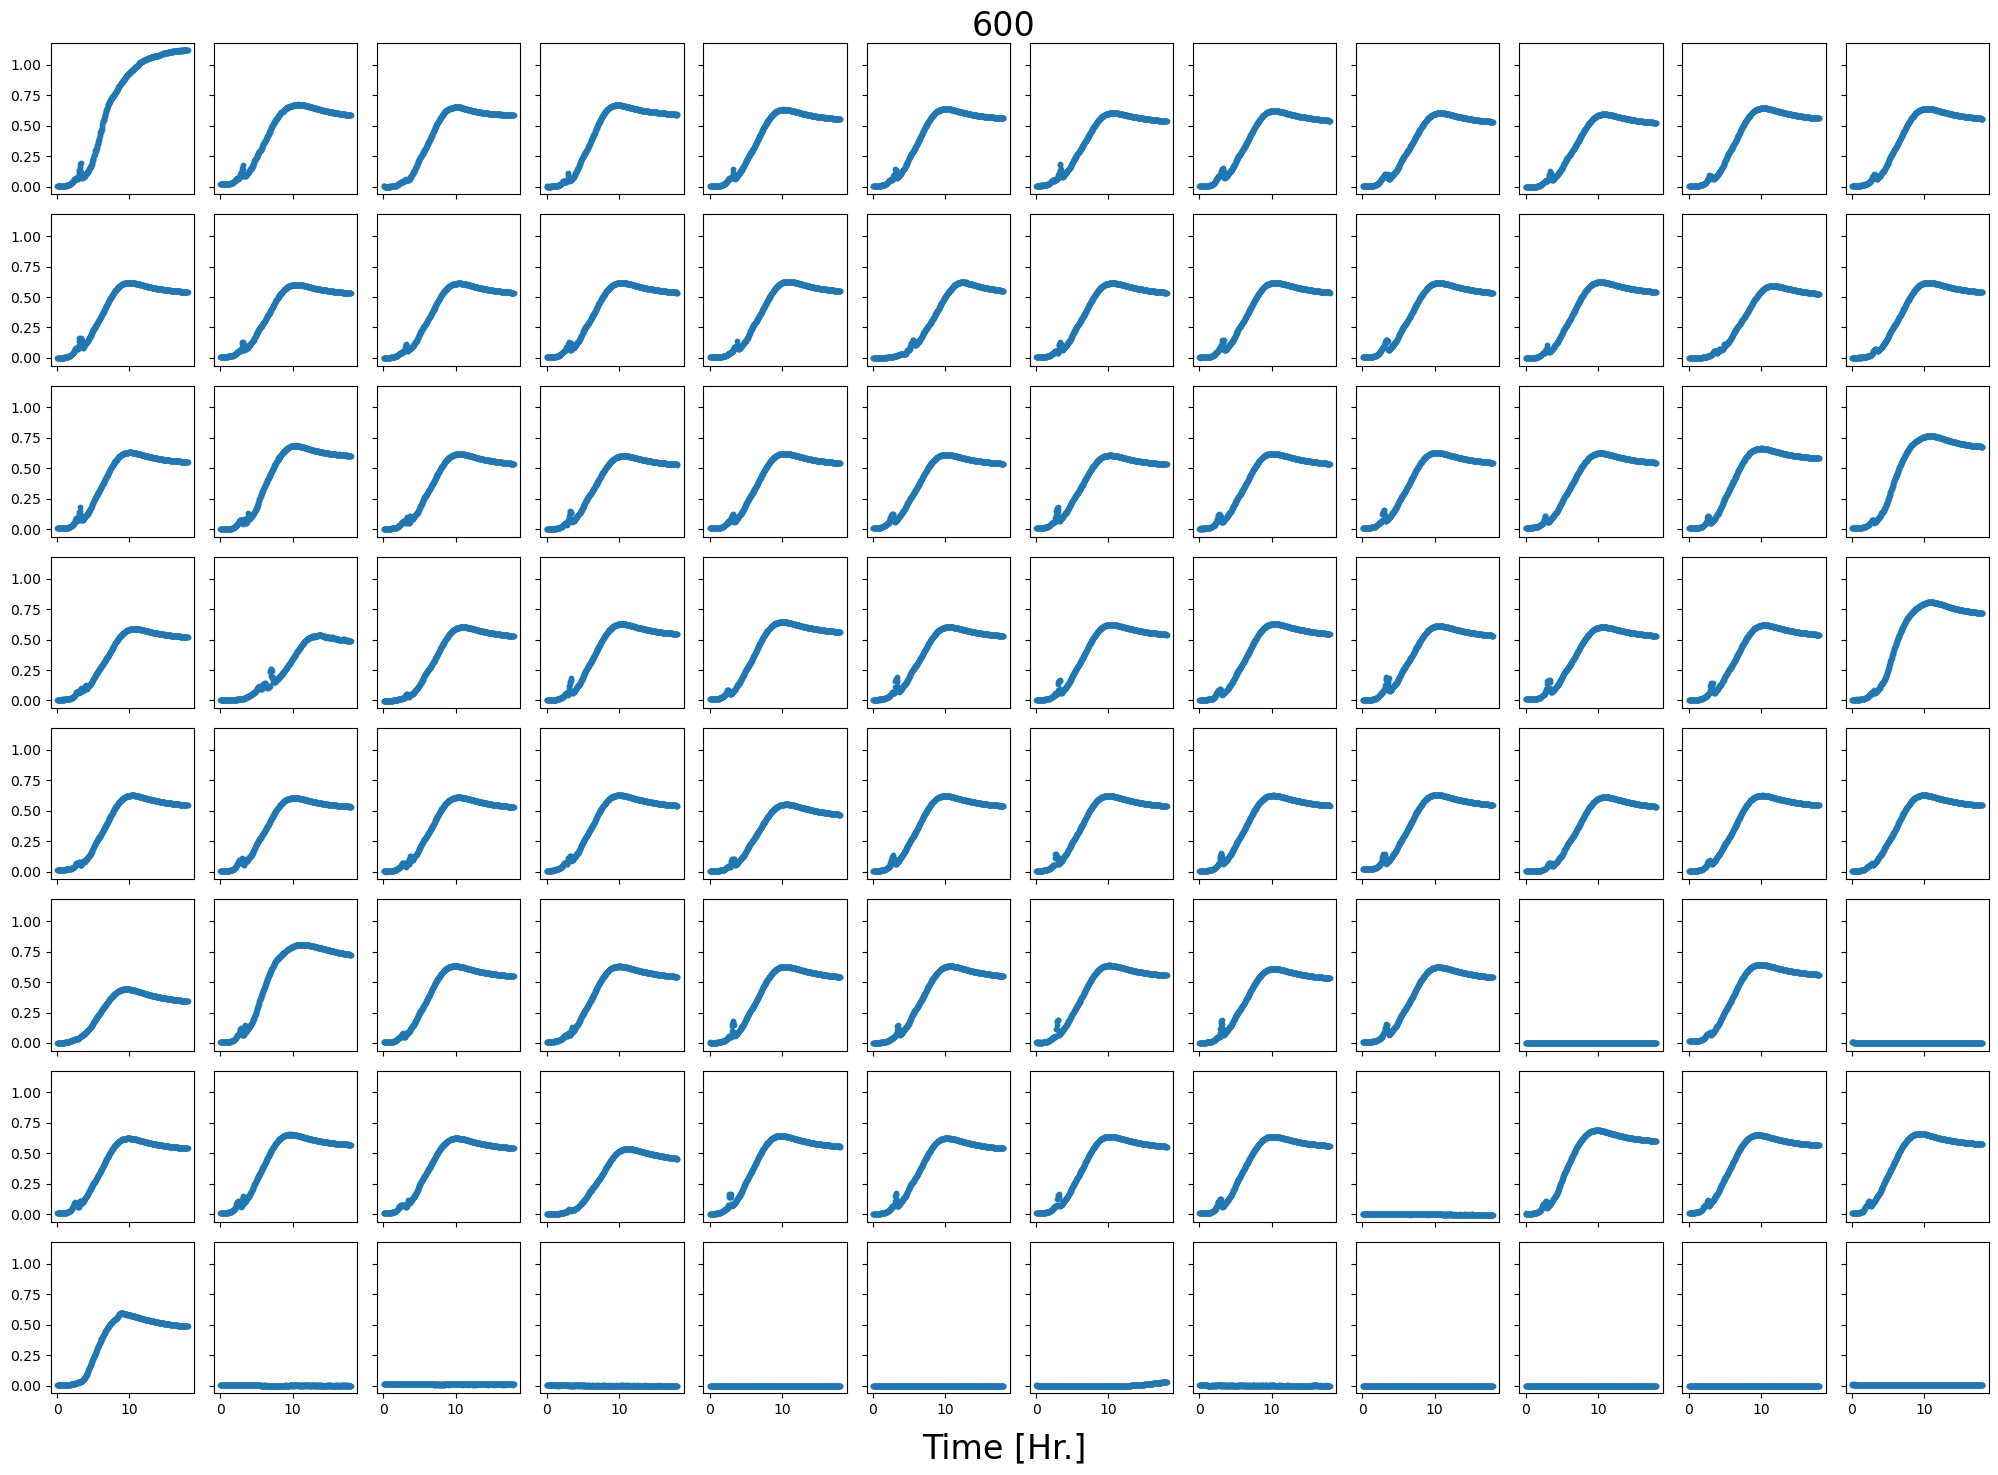

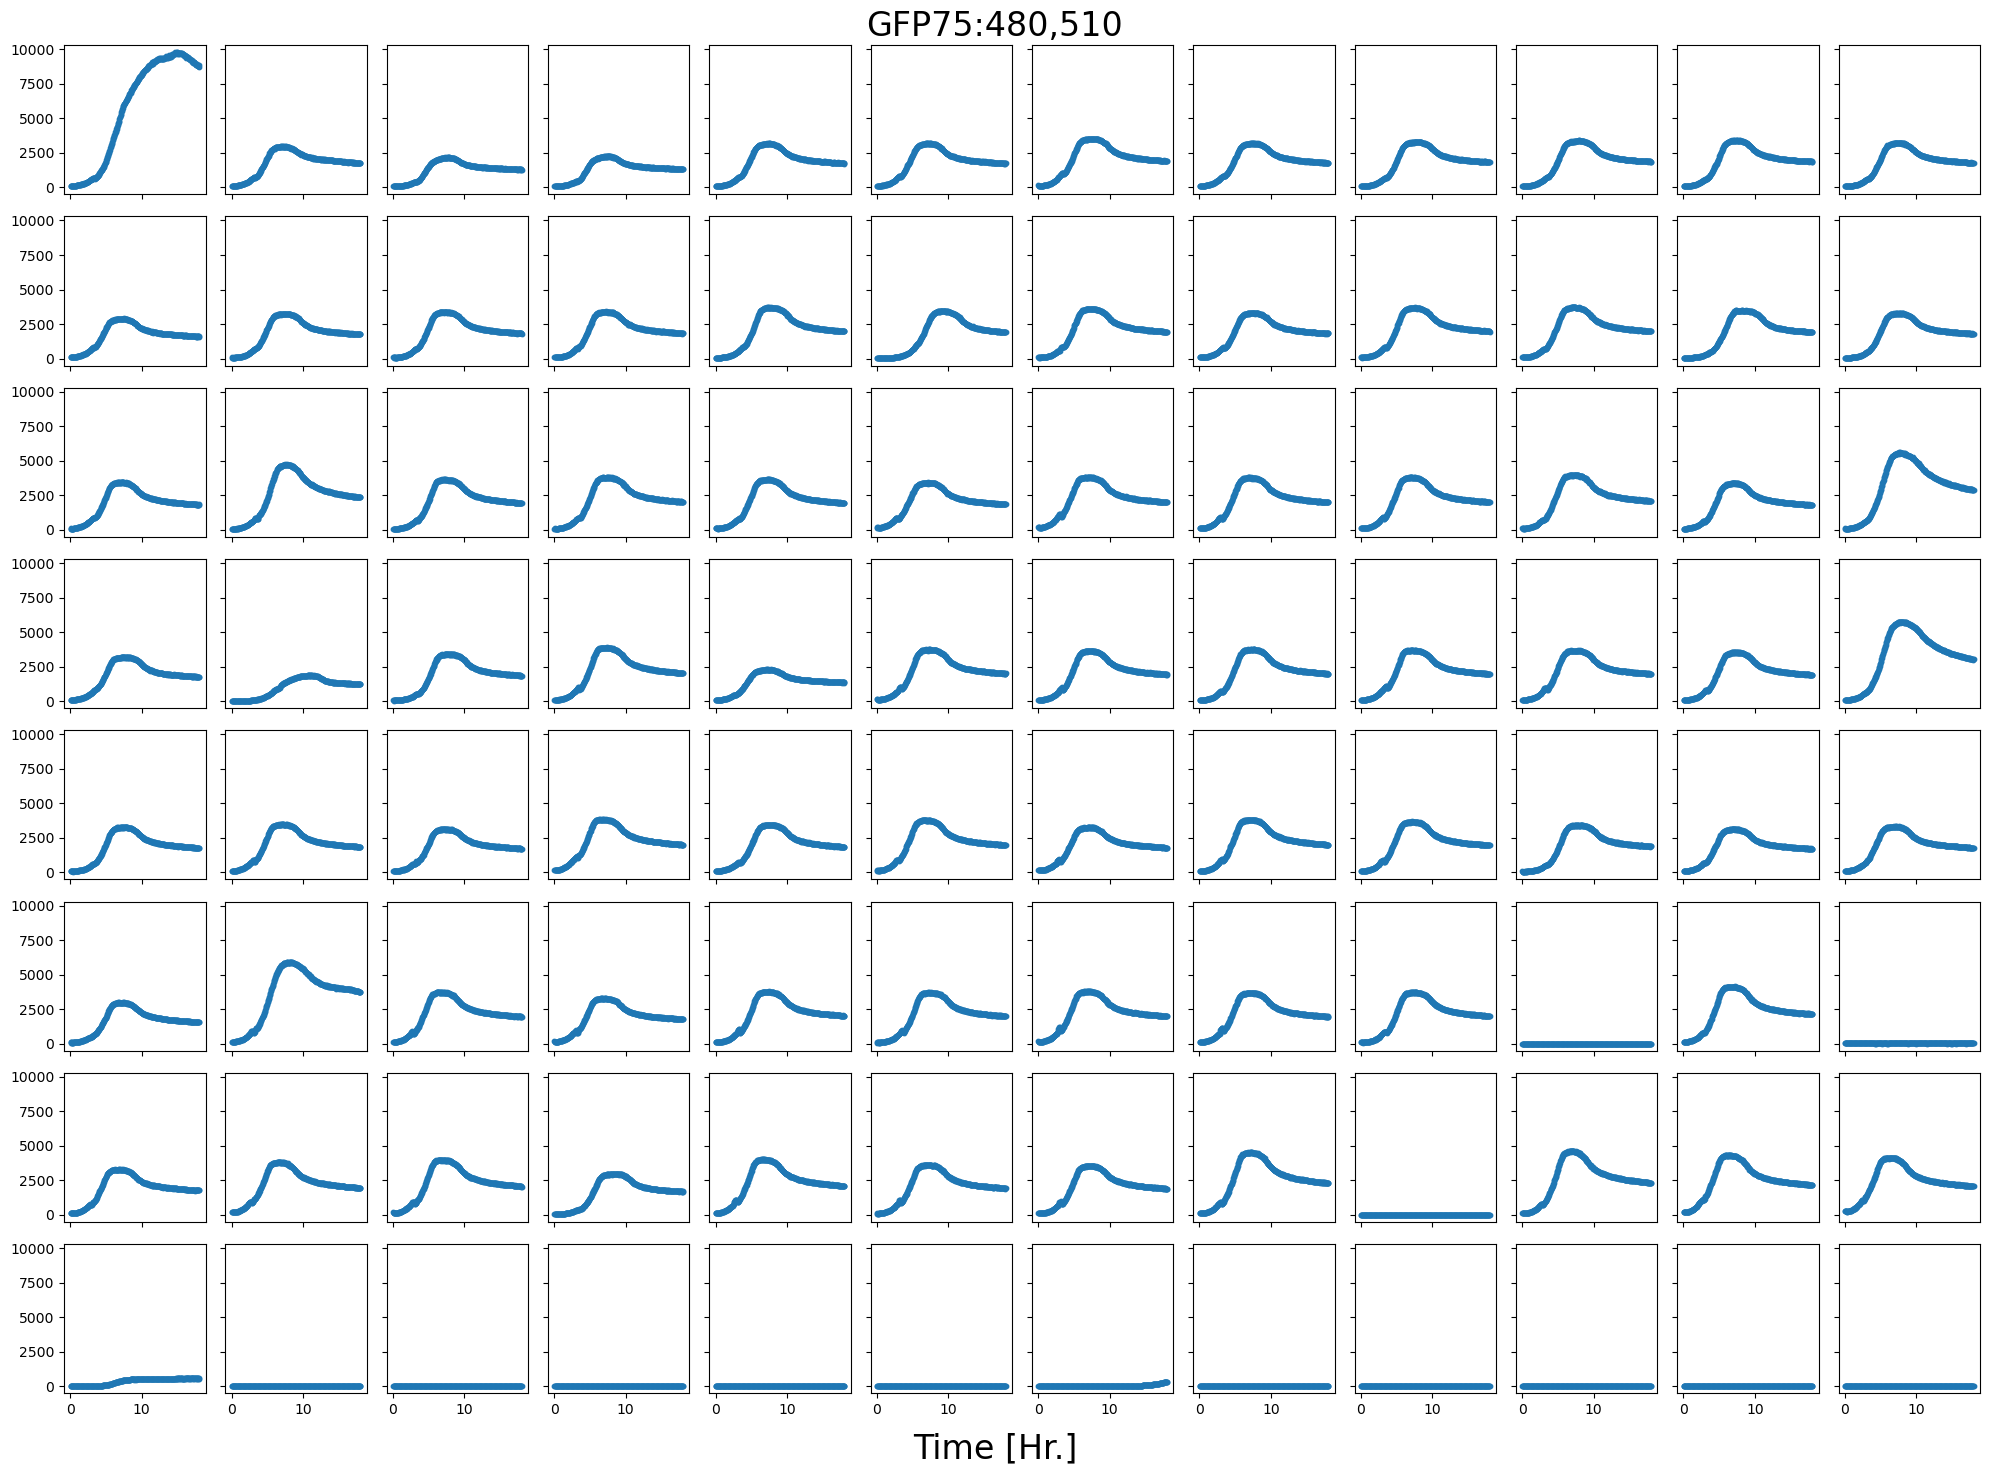

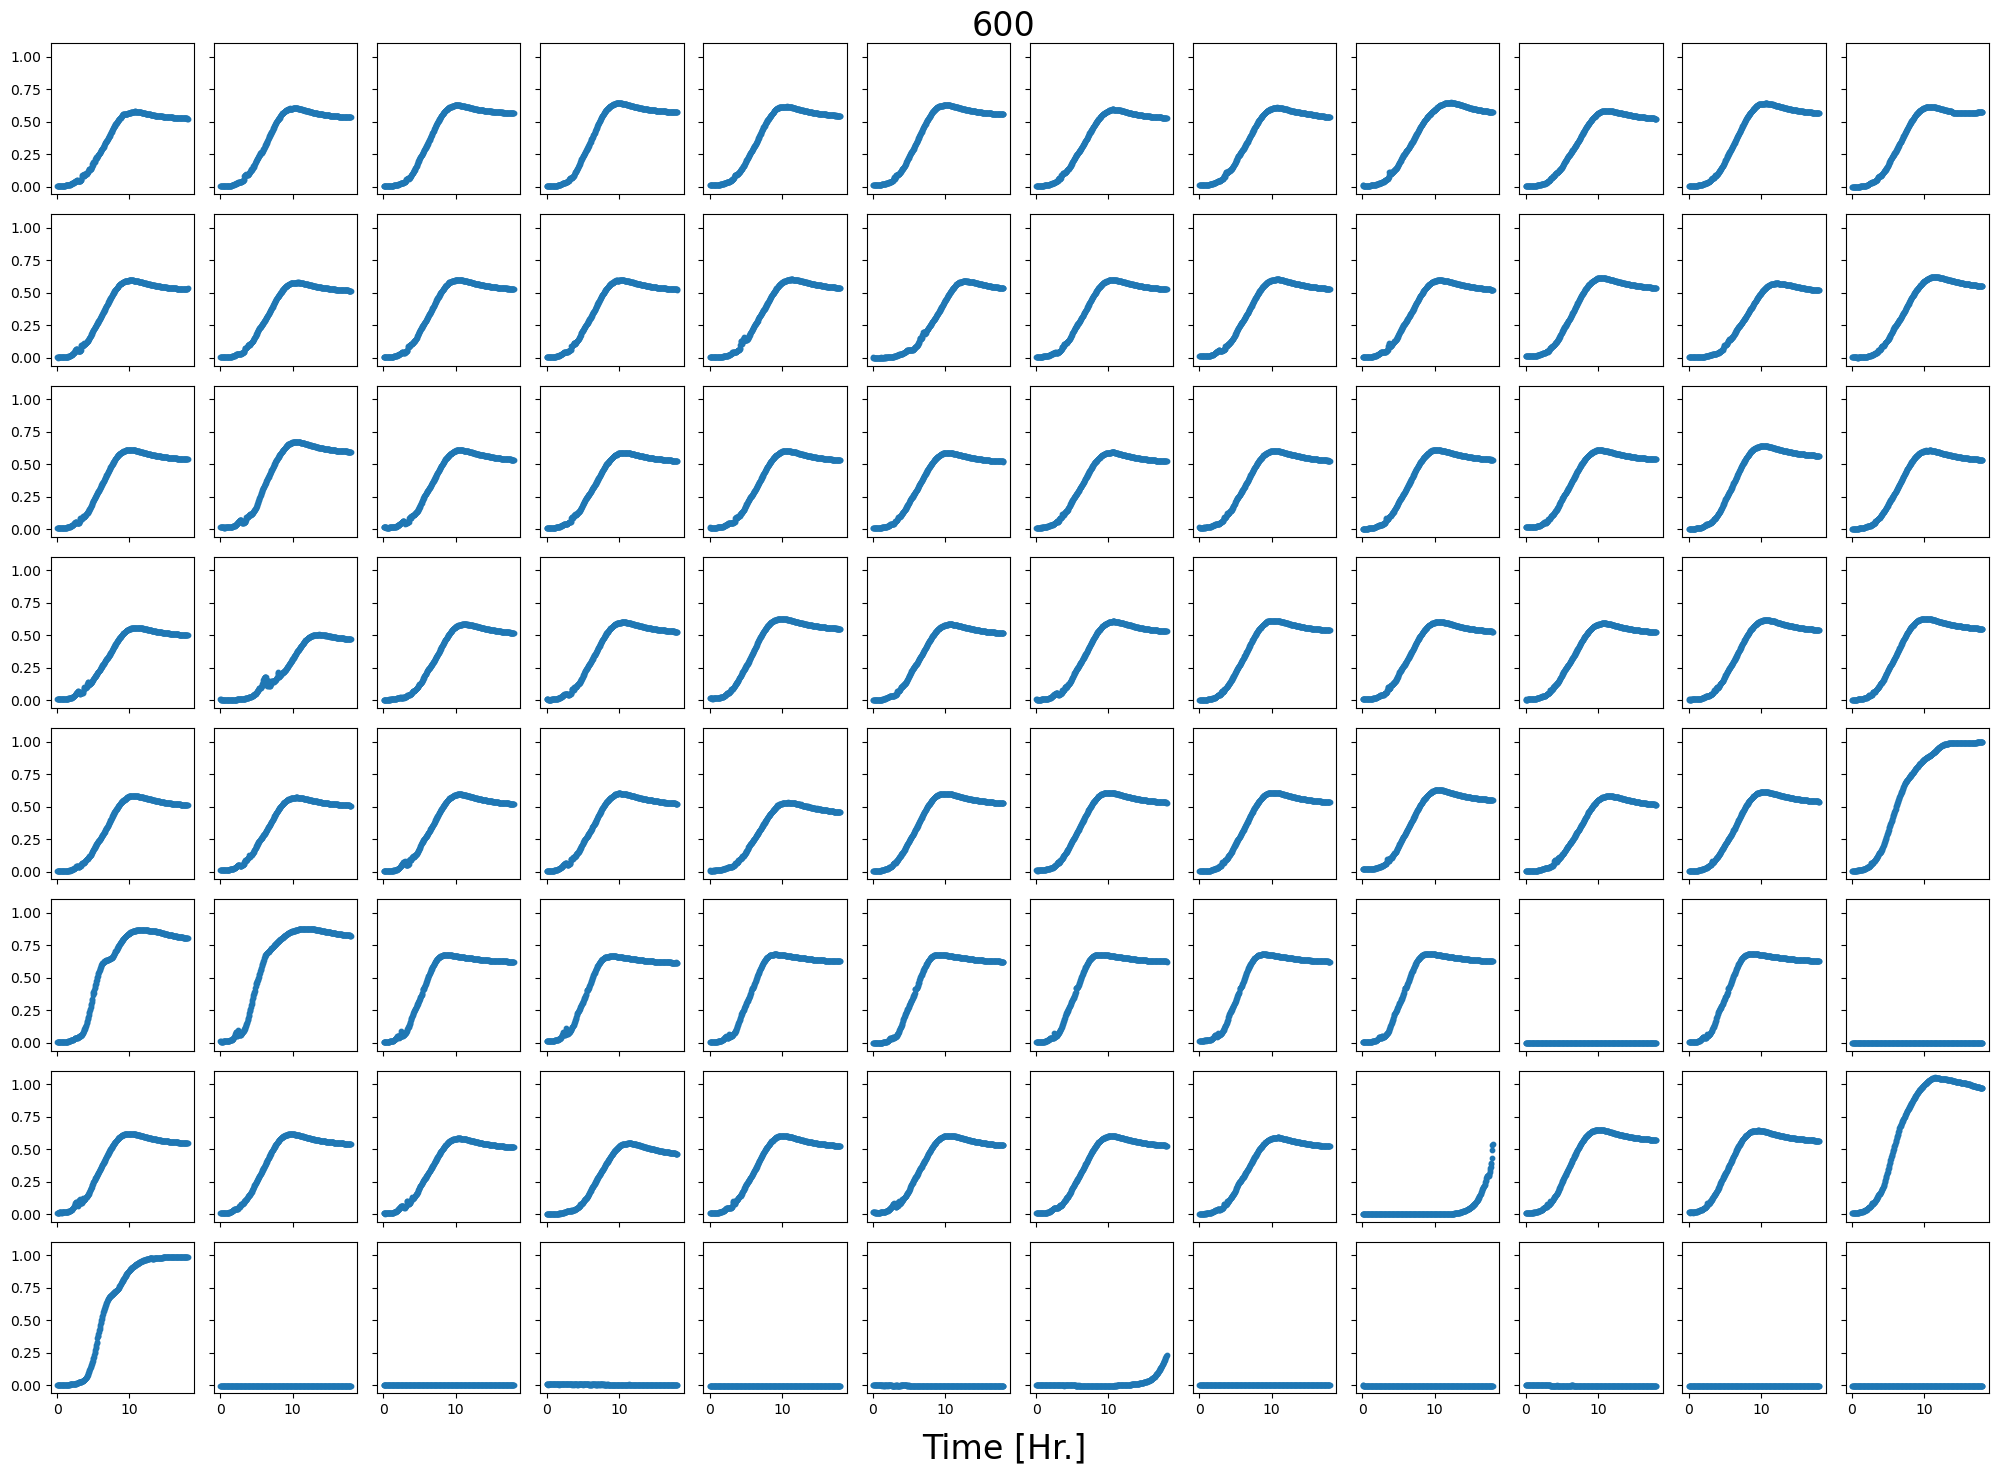

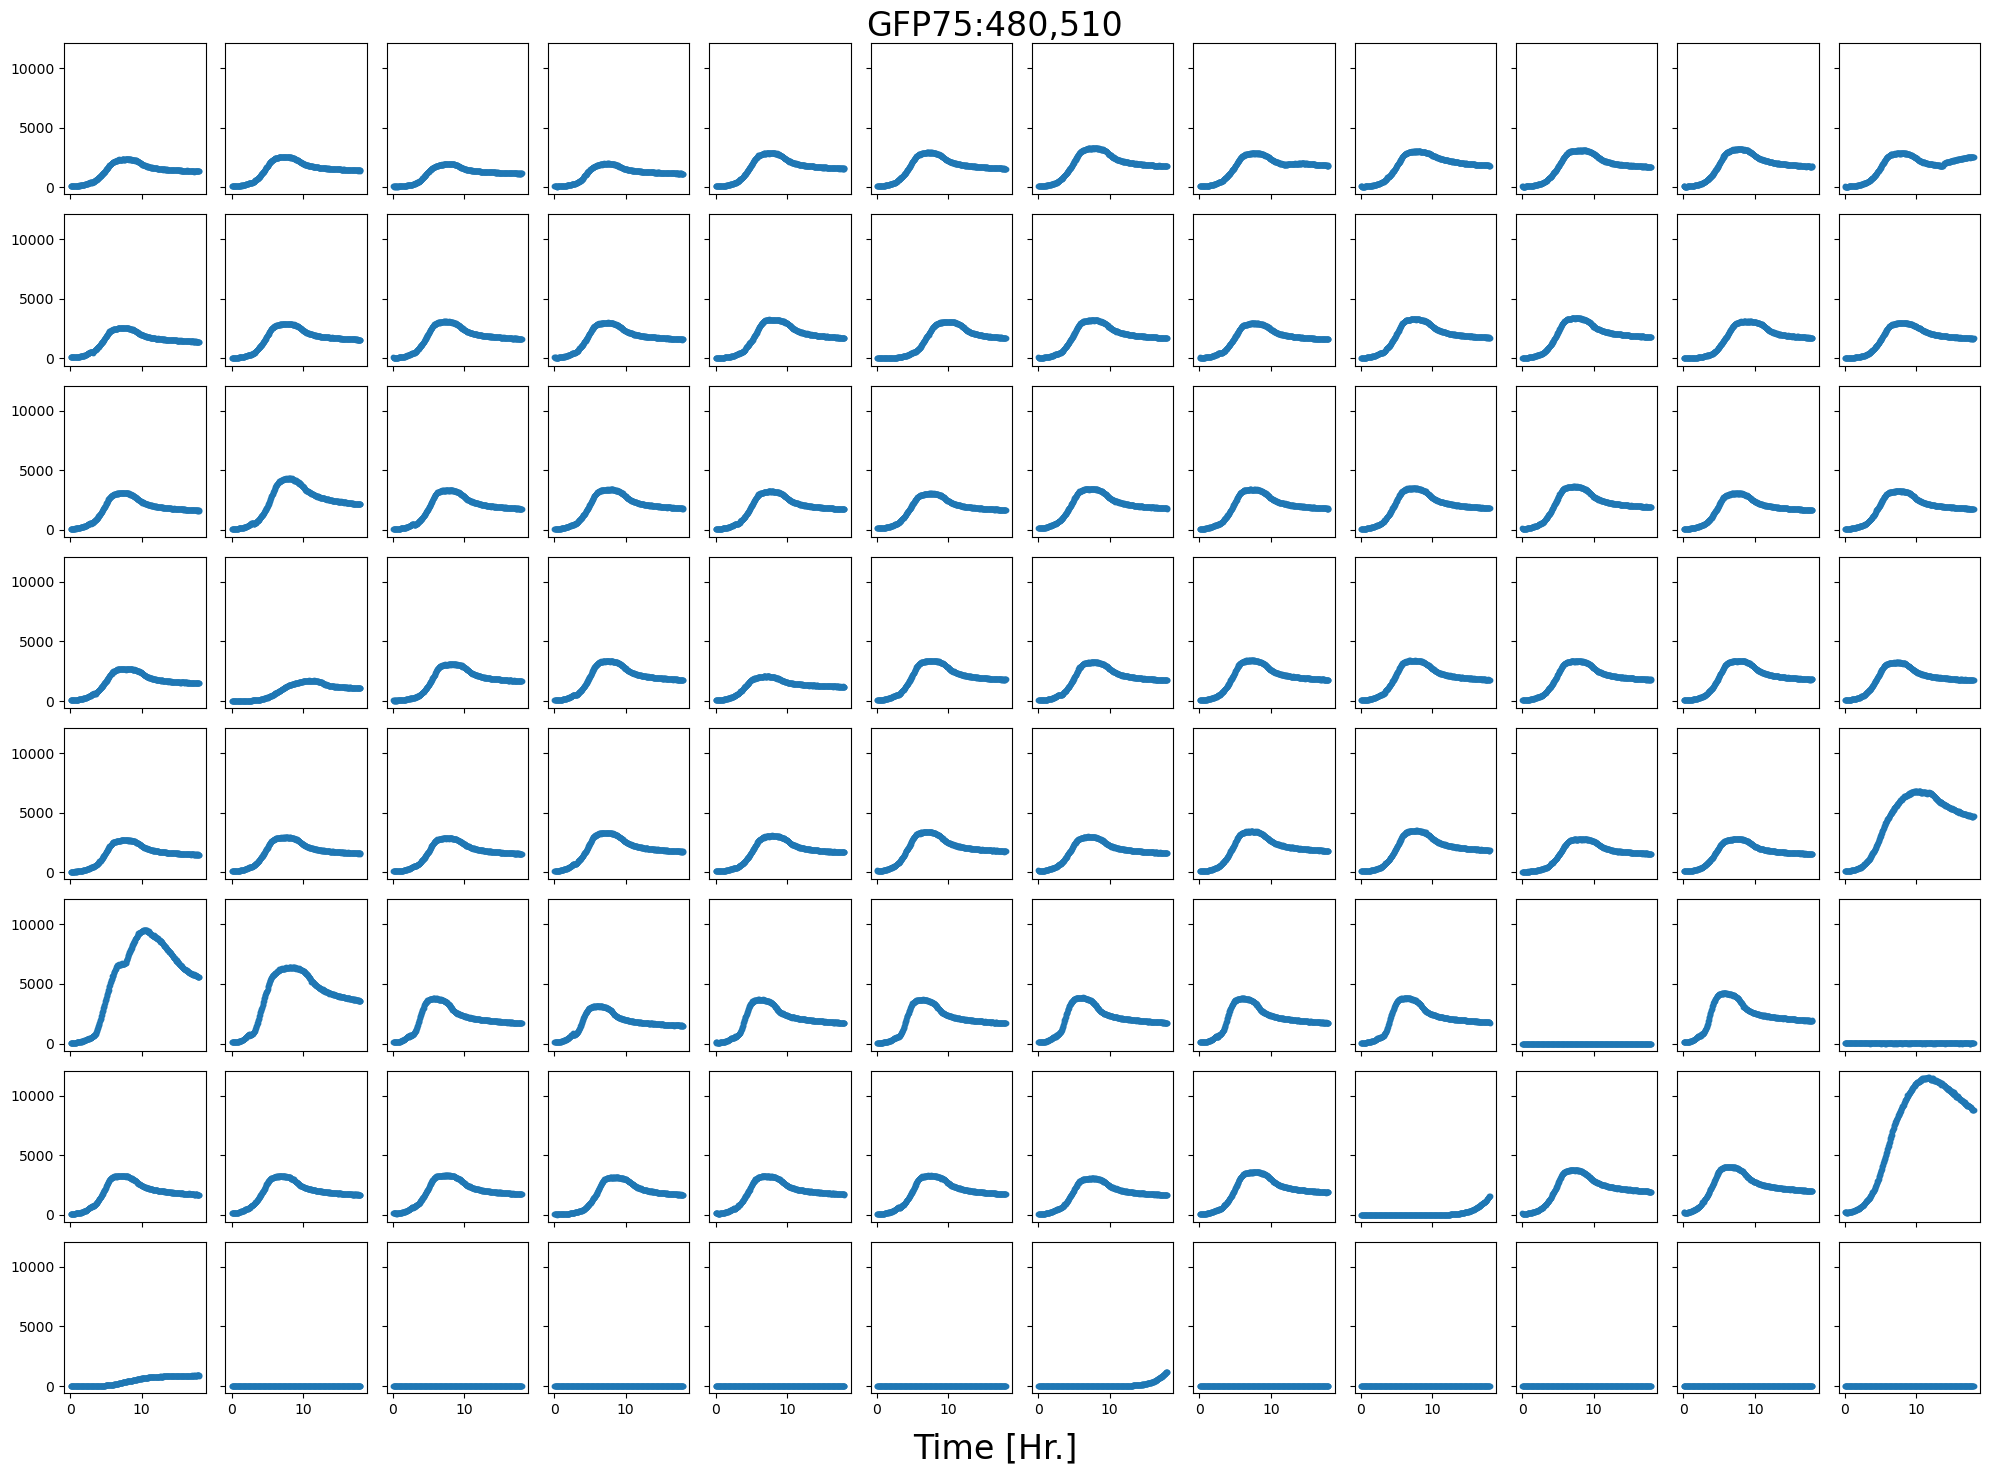

In [6]:
for data in data_blanked_l:
    for read in reads:
        prt.well_curves(data, time0mM, read)

In [7]:
data_blanked_l[2].keys()

dict_keys(['600', '600_err', 'GFP75:480,510', 'GFP75:480,510_err'])

In [8]:
for data in data_blanked_l:
    for read in reads:
        data[read][data[read]<0]=0

In [9]:
# Blank by subtracting the blank wells H1-H2 and H5-H12. Also adds the associated error calculated by tge standard deviation.
data_normed_l = [{}, {}, {}]  
for i, data in enumerate(data_blanked_l):
    data_normed_l[i]['GFP_Normalized'] = data[reads[1]]/(0.01+data[reads[0]])
    data_normed_l[i]['GFP_Normalized_err'] = np.ones(data[read].shape)*np.std(np.concatenate((data[read][7,0:2,:],data[read][7,4:,:])))

In [10]:
data_normed_l[2].keys()

dict_keys(['GFP_Normalized', 'GFP_Normalized_err'])

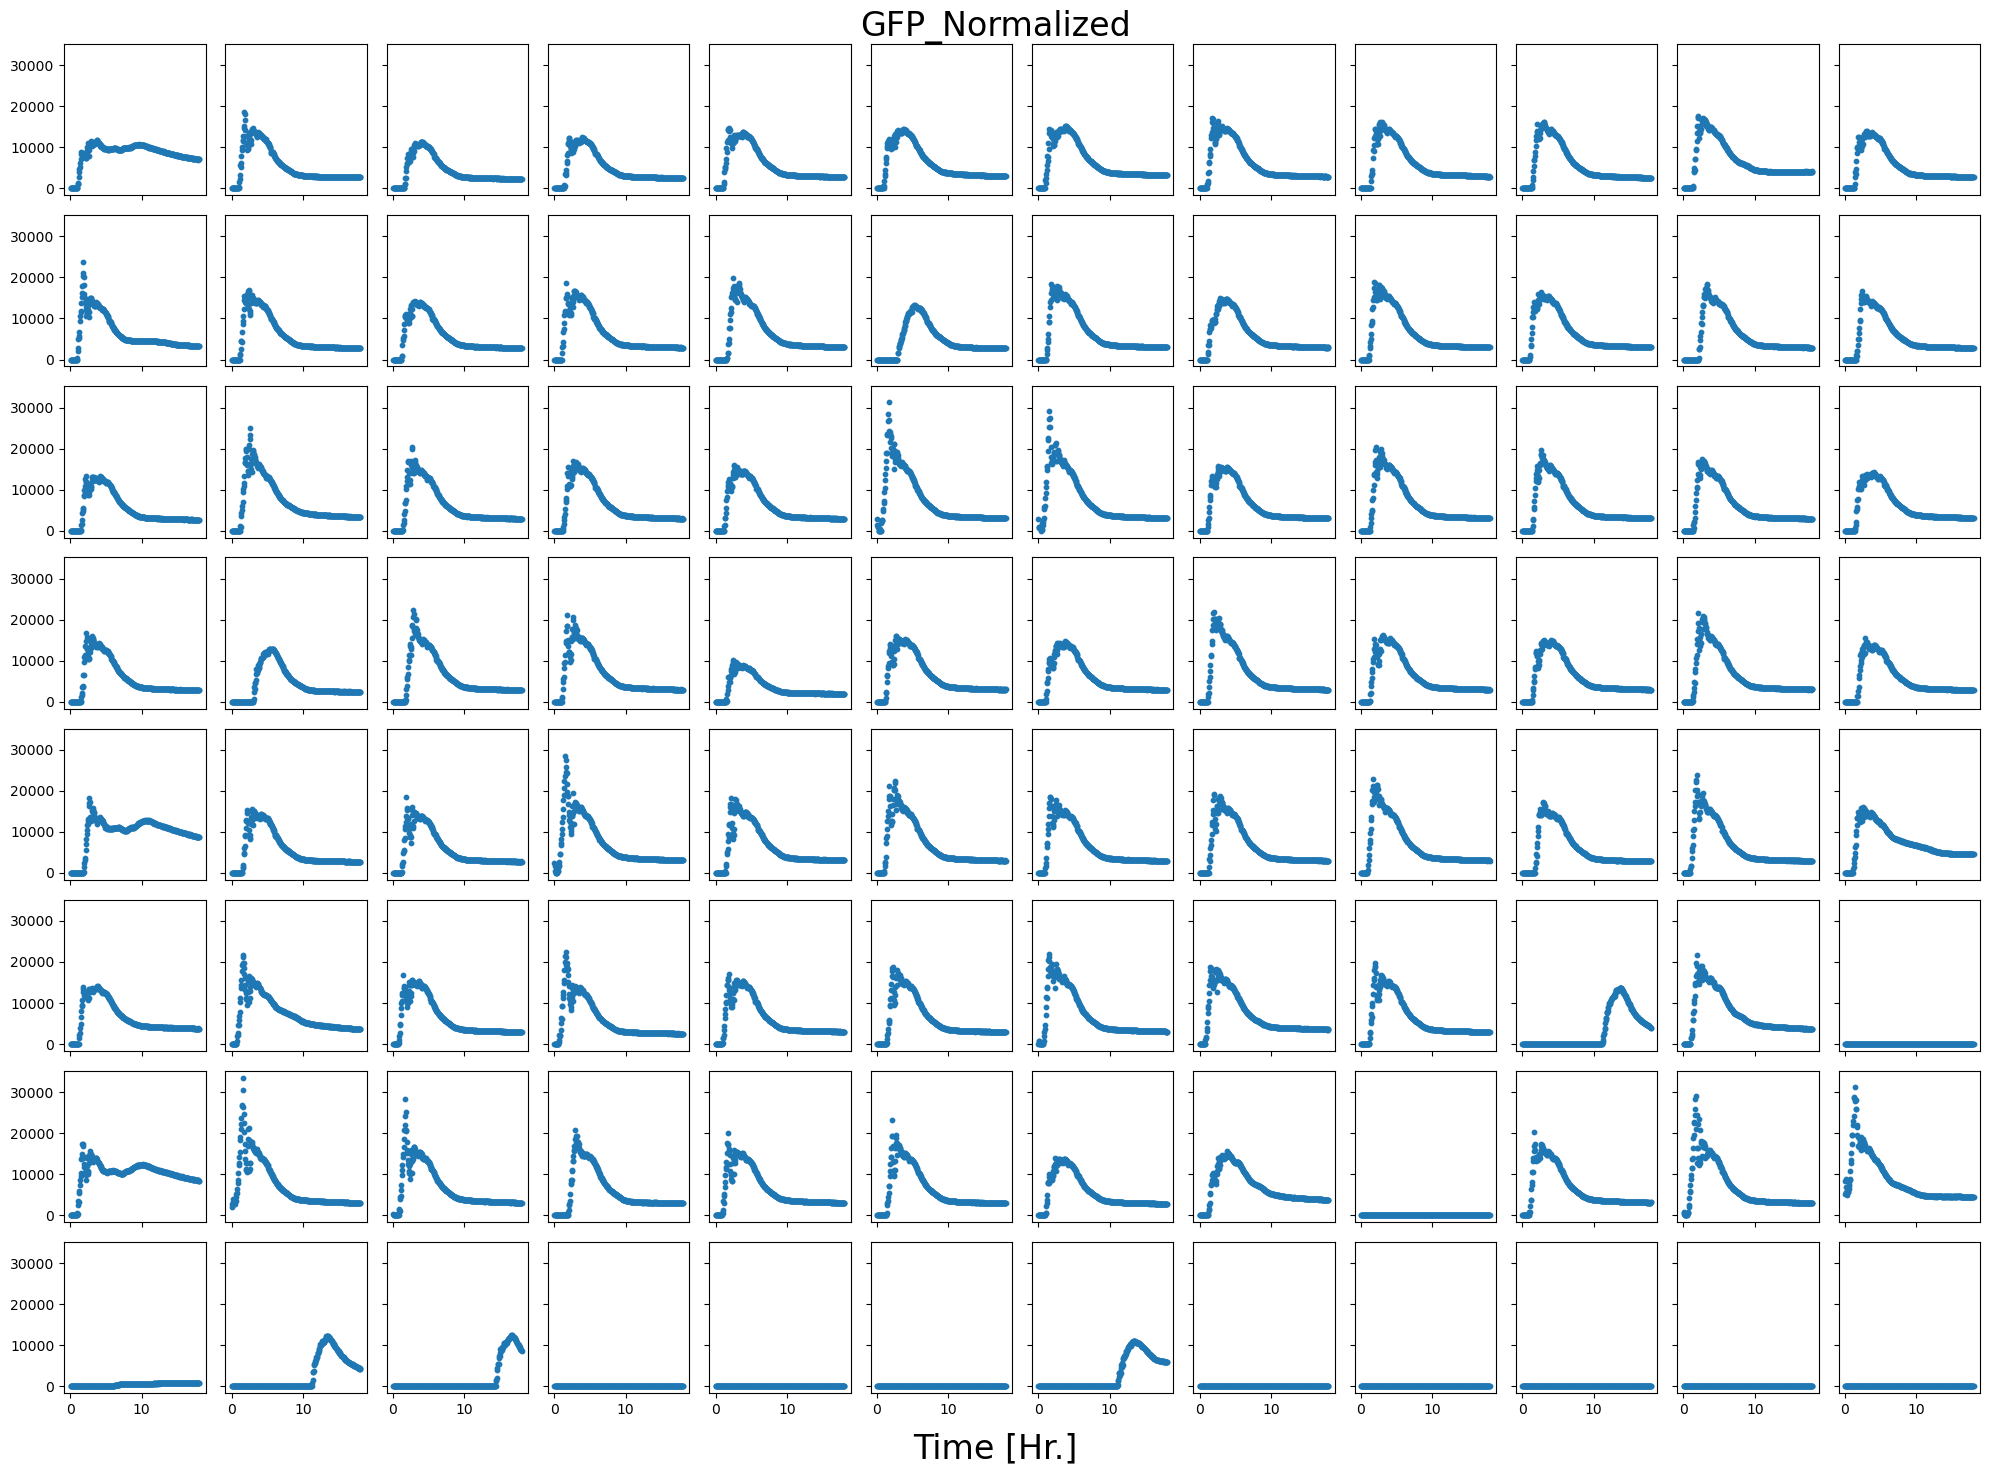

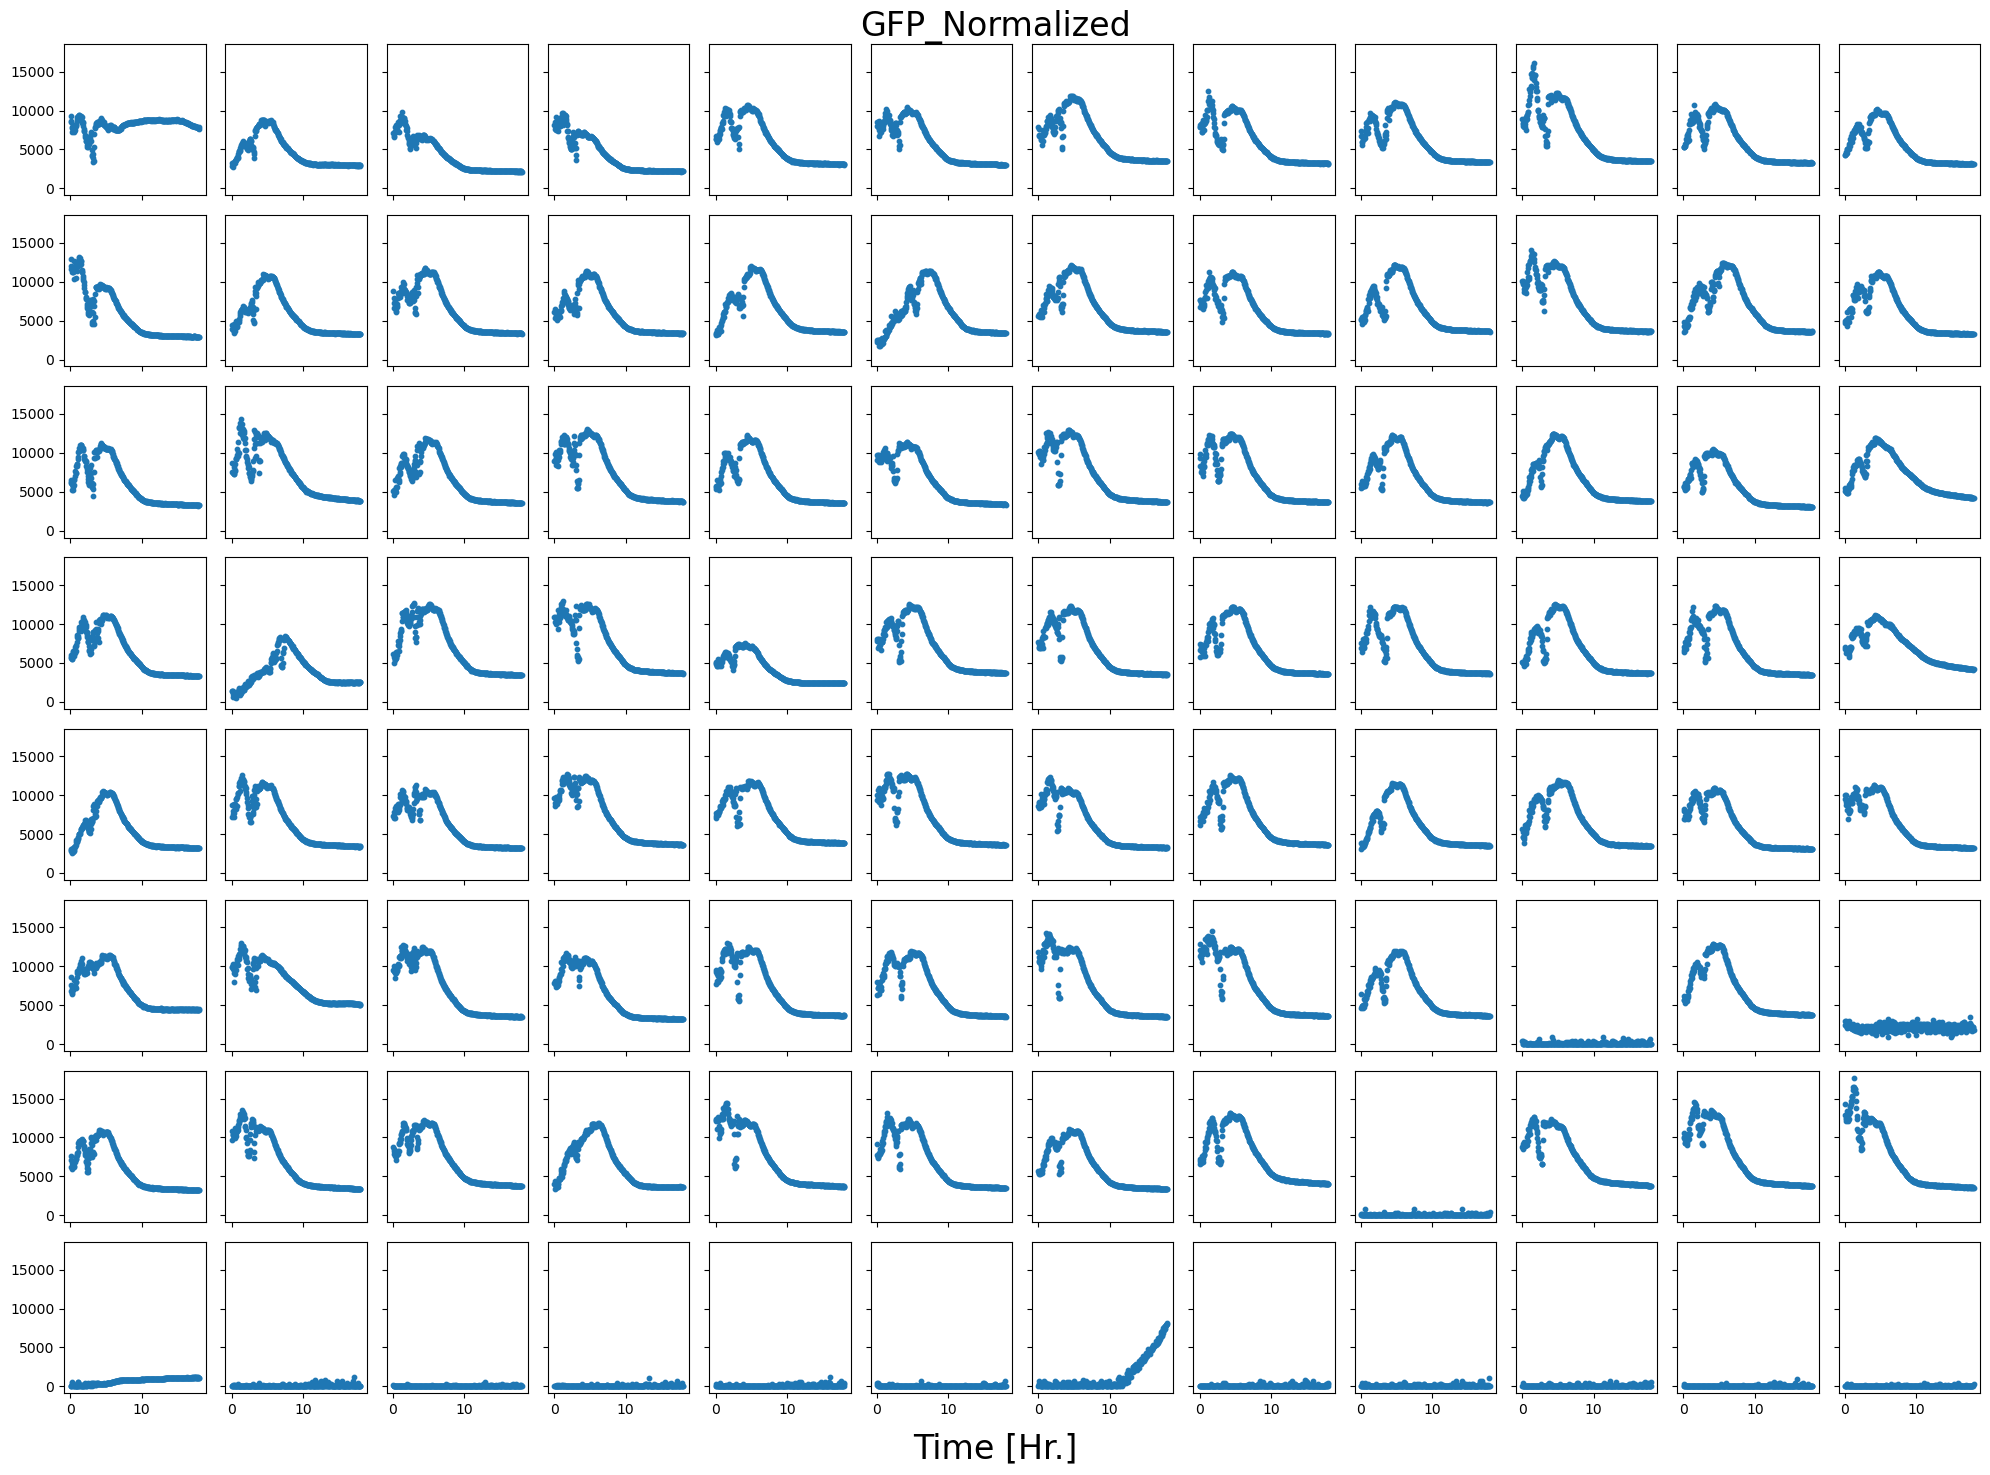

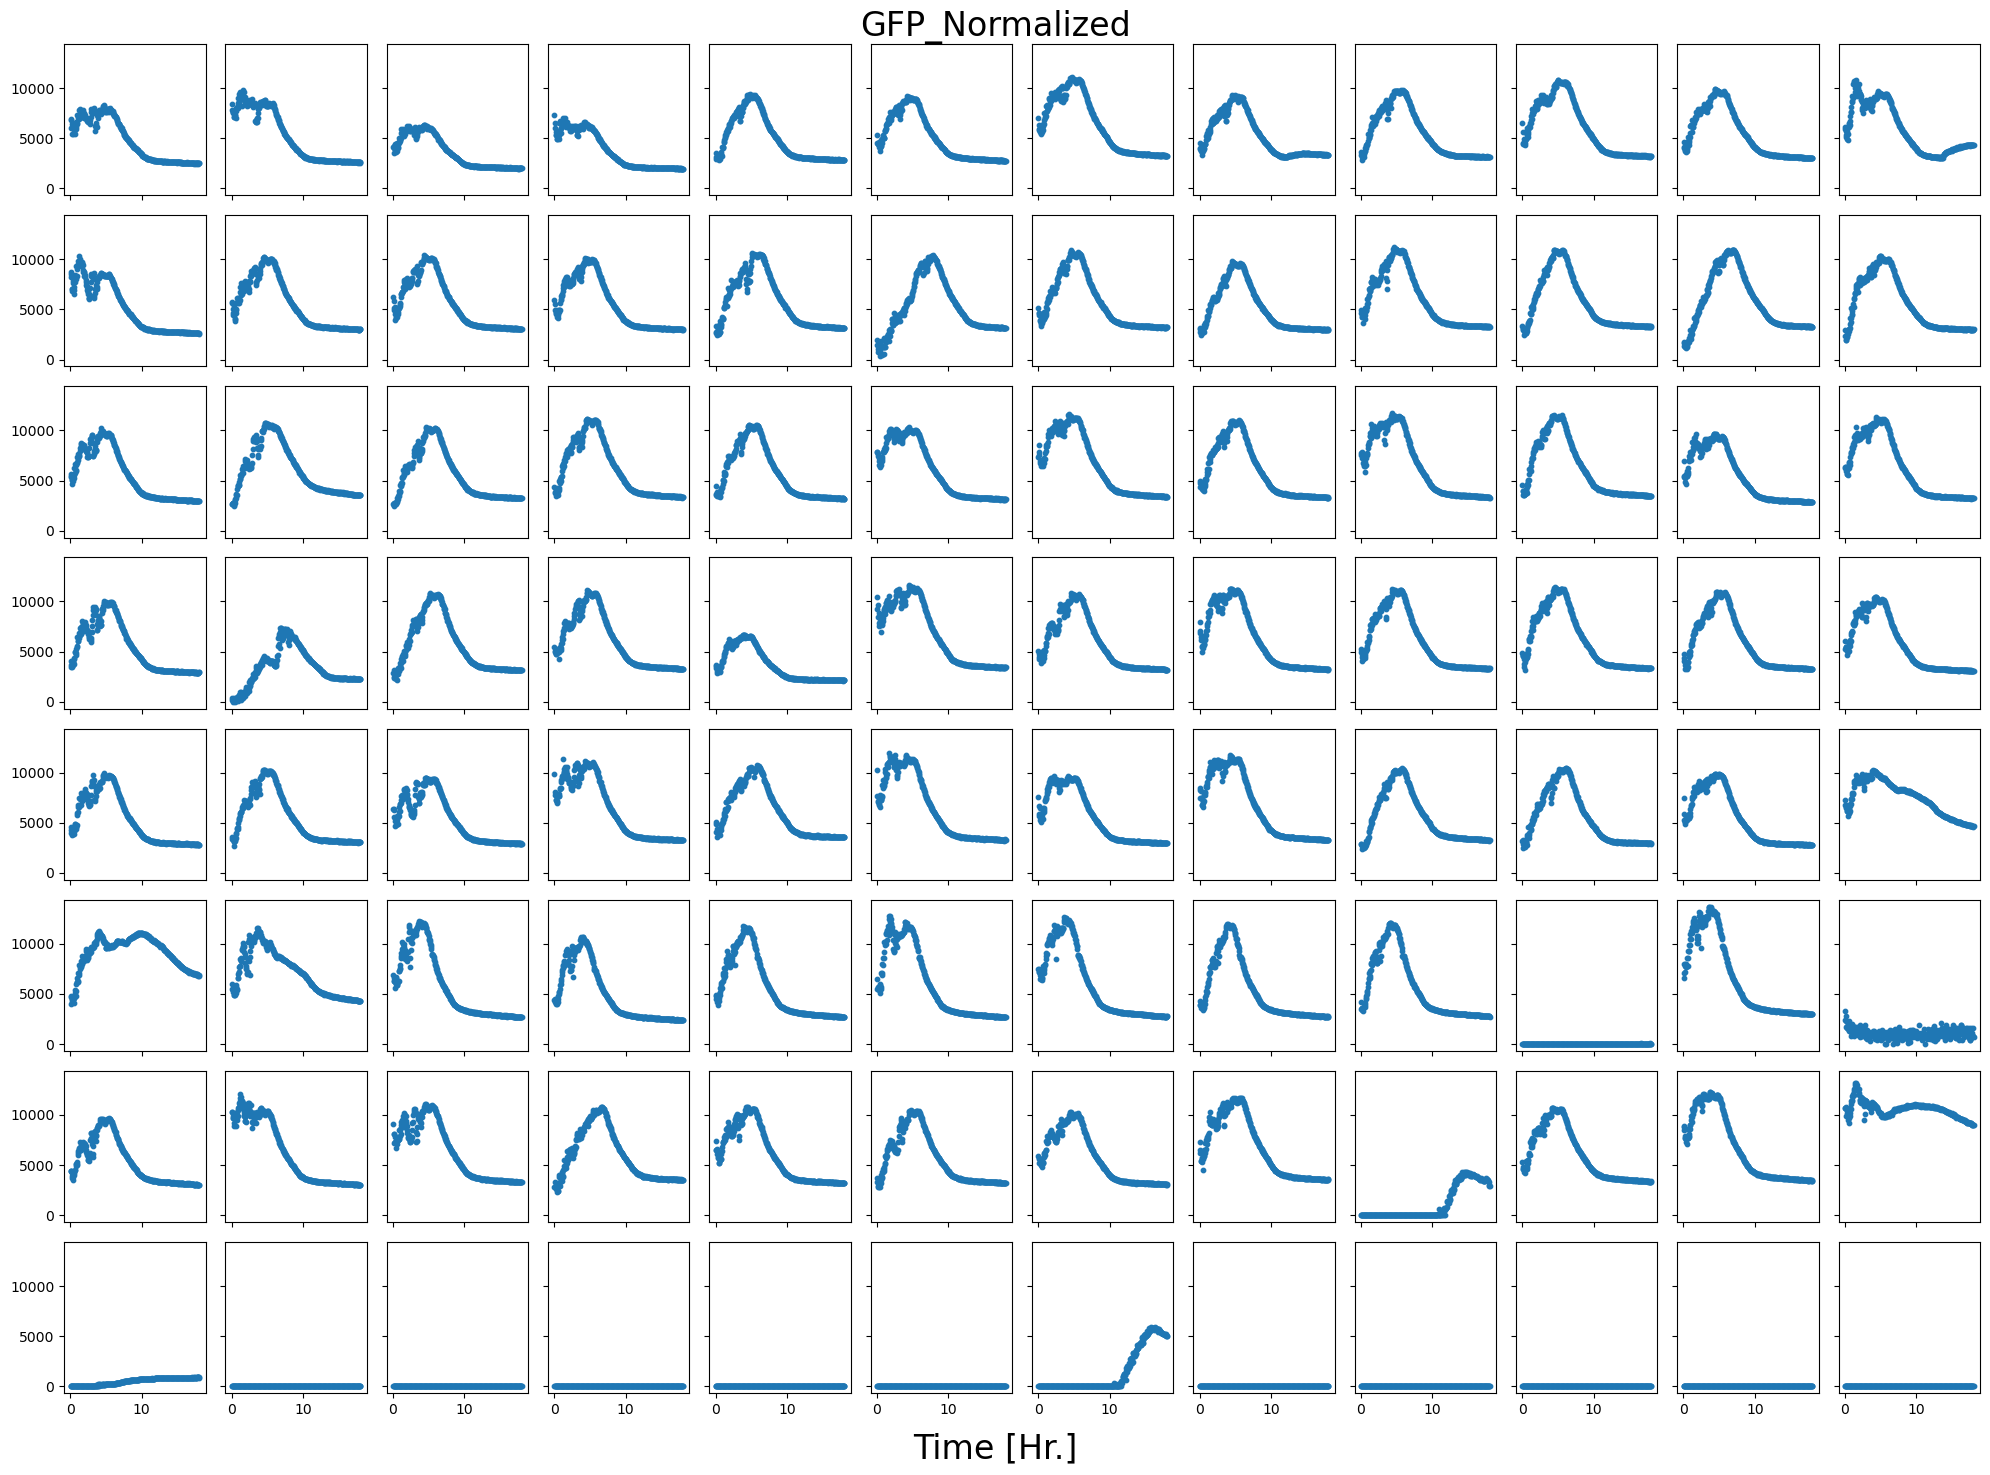

In [11]:
times = [{'GFP_Normalized': np.mean((time0mM[reads[0]], time0mM[reads[1]]), axis=0)}, 
         {'GFP_Normalized': np.mean((time1mM[reads[0]], time1mM[reads[1]]), axis=0)}, 
         {'GFP_Normalized': np.mean((time10mM[reads[0]], time10mM[reads[1]]), axis=0)}]
for i, data in enumerate(data_normed_l):
    prt.well_curves(data, times[i], 'GFP_Normalized')

In [12]:
titles = [
    ['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11'],
    ['s13', 's14', 's15', 's16', 's19', 's20', 's21', 's22a', 's25', 's26', 's27', 's28'],
    ['s30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's41', 's42'],
    ['s43', 's44', 's45', 's46', 's47', 's49', 's50', 's51', 's52', 's53', 's54', 's55'],
    ['s56', 's57', 's58', 's59', 's60', 's61', 's62', 's63', 's65', 's66', 's67', 's68'],
    ['s69', 's70', 's71', 's84', 's85', 's86', 's87', 's88', 'H7', 's93', 's94', 's95'],
    ['s72', 's74', 's76', 's77', 's78', 's79', 's80', 's81', 's82', 's83', 'dCasRx\npEYF1k', 'pEYF1K'],
    ['WildType', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank', 'Blank']
]


/usr/local/anaconda3/envs/p2x11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


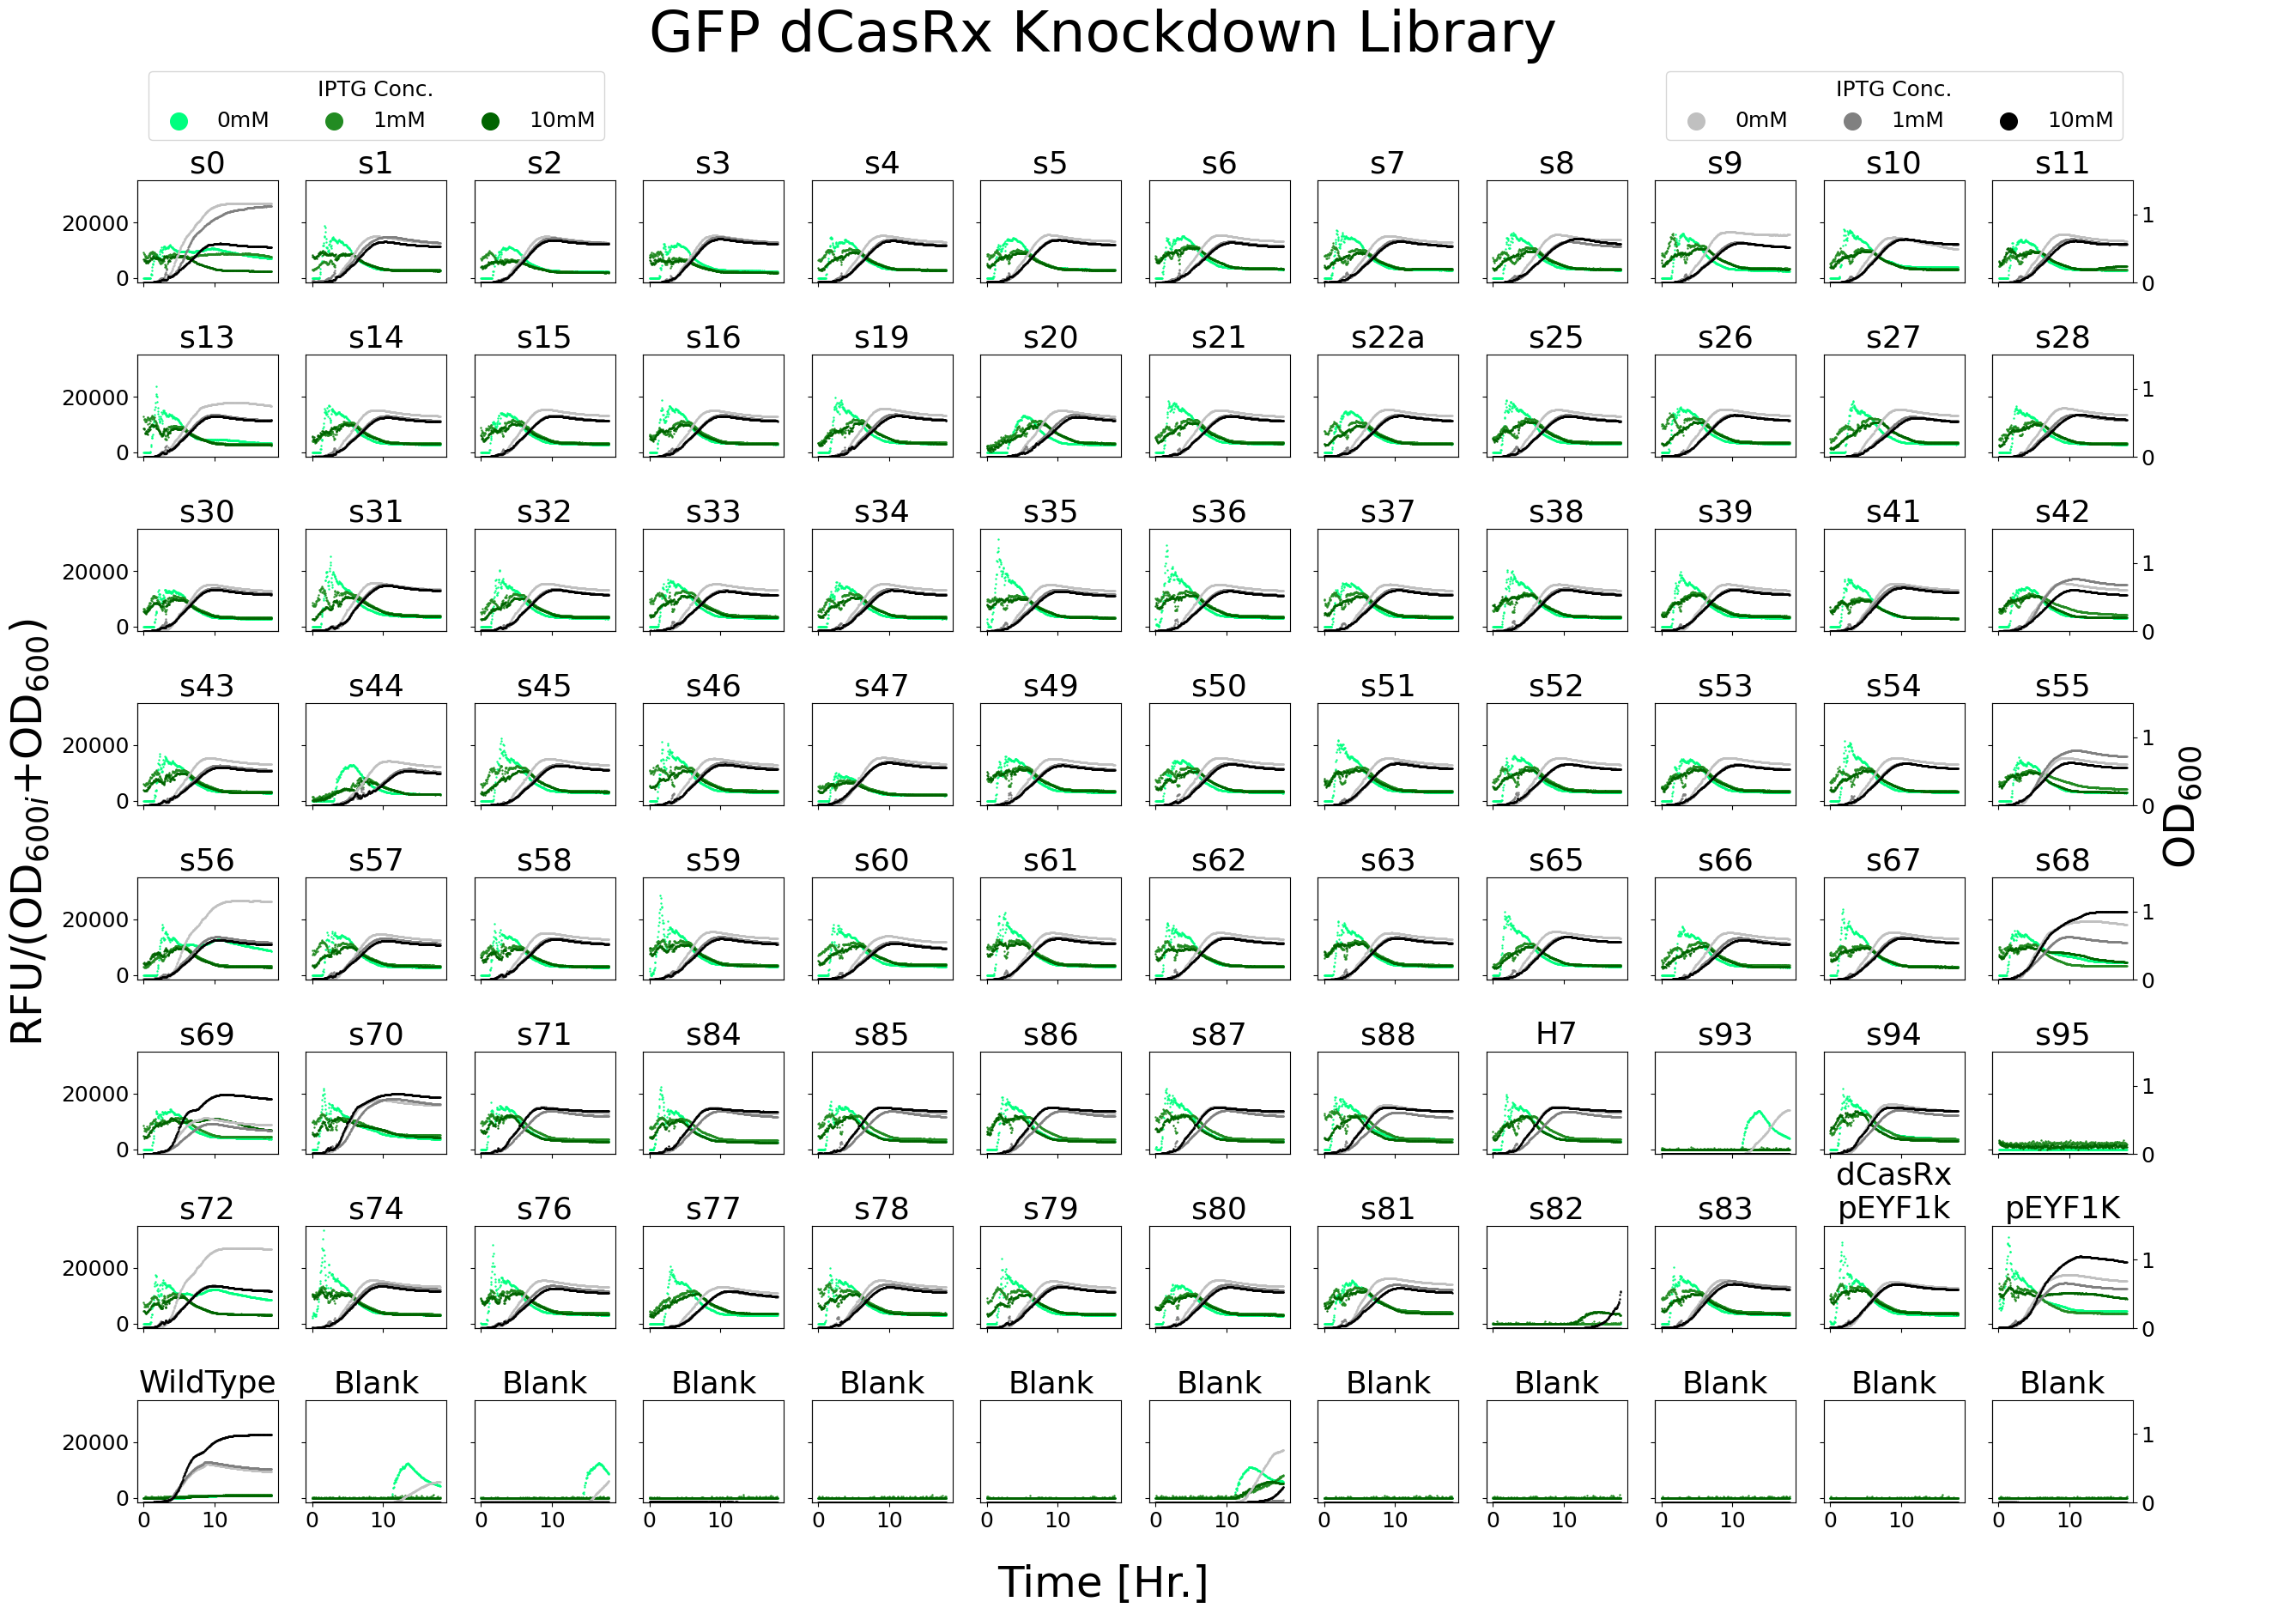

In [13]:
fig, axs = plt.subplots(8,12, sharey=True, sharex=True, figsize=(30,20), layout='tight')
face_size = 0.5
title_fsize = 48
subtitle_fsize = 26
label_fsize = 36
axis_fsize = 18
axs2_l = []

Test = False

for i in range(8):
    for j in range(12):
        axs2 = axs[i,j].twinx()
        if not Test:
            axs2.set_ylim((0,1.5))
            axs2.yaxis.set_tick_params(labelsize=axis_fsize) 
            p21 = axs2.scatter(times[0]['GFP_Normalized'], data_blanked_l[0]['600'][i,j,:], s=face_size, color='silver')
            p22 = axs2.scatter(times[1]['GFP_Normalized'], data_blanked_l[1]['600'][i,j,:], s=face_size, color='gray')
            p23 = axs2.scatter(times[2]['GFP_Normalized'], data_blanked_l[2]['600'][i,j,:], s=face_size, color='Black')
            if j != 11:
                axs2.get_yaxis().set_ticks([])
            p1 = axs[i,j].scatter(times[0]['GFP_Normalized'], data_normed_l[0]['GFP_Normalized'][i,j,:], s=face_size, label='0mM', color='springgreen')
            p2 = axs[i,j].scatter(times[1]['GFP_Normalized'], data_normed_l[1]['GFP_Normalized'][i,j,:], s=face_size, label='1mM', color='forestgreen')
            p3 = axs[i,j].scatter(times[2]['GFP_Normalized'], data_normed_l[2]['GFP_Normalized'][i,j,:], s=face_size, label='10mM', color='darkgreen')
        
        axs[i,j].set_title(titles[i][j], size=subtitle_fsize)
        
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
         
        axs[i,j].yaxis.set_tick_params(labelsize=axis_fsize)
        axs[i,j].xaxis.set_tick_params(labelsize=axis_fsize)  
        
        axs3 = copy.copy(axs2)

plt.subplots_adjust(hspace=0.7)
if Test:
    p1 = mpatches.Patch(color='red', label='The red data')
    p2 = mpatches.Patch(color='red', label='The red data')
    p3 = mpatches.Patch(color='red', label='The red data')
    p21 = mpatches.Patch(color='red', label='The red data')
    p22 = mpatches.Patch(color='red', label='The red data')
    p23 = mpatches.Patch(color='red', label='The red data')        
fig.suptitle('GFP dCasRx Knockdown Library', size=title_fsize)
fig.supxlabel('Time [Hr.]', size=label_fsize, y = 0.05)
fig.supylabel('RFU/(OD$_{600i}$+OD$_{600}}$)', size=label_fsize, x=0.075)
secondylabel = plt.annotate('OD$_{600}$', xy=(0.96, 0.5), xycoords=fig, size=label_fsize, ha='right', va='center', rotation=90)
fig.legend([p1,p2,p3], ['0mM', '1mM', '10mM'], loc='outside upper left', bbox_to_anchor=(0.125,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
fig.legend([p21,p22,p23], ['0mM', '1mM', '10mM'], loc='outside upper right', bbox_to_anchor=(0.90,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
plt.show()

In [14]:
# Determine the area under the curve for the fluorescence.

AUC = []
for i, data in enumerate(data_normed_l):
    AUC.append(np.trapz(data['GFP_Normalized']))
    AUC[i][7,1:] = np.nan
    AUC[i][5,9] = np.nan
    AUC[i][5,11] = np.nan
    AUC[i][6,8] = np.nan

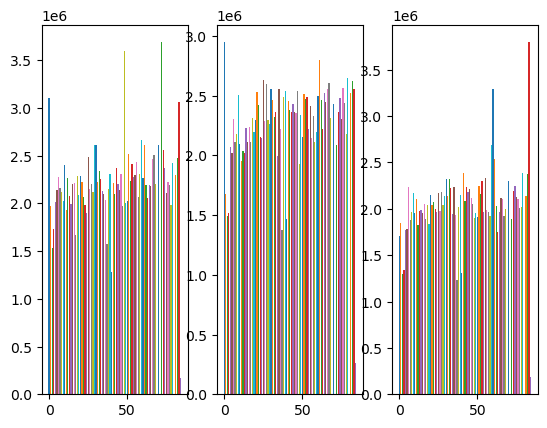

In [15]:
fig, axs = plt.subplots(1,3)
for i in range(8):
    for j in range(12):
        ind = j+i*12
        axs[0].bar(ind, AUC[0][i,j])
        axs[1].bar(ind, AUC[1][i,j])
        axs[2].bar(ind, AUC[2][i,j])

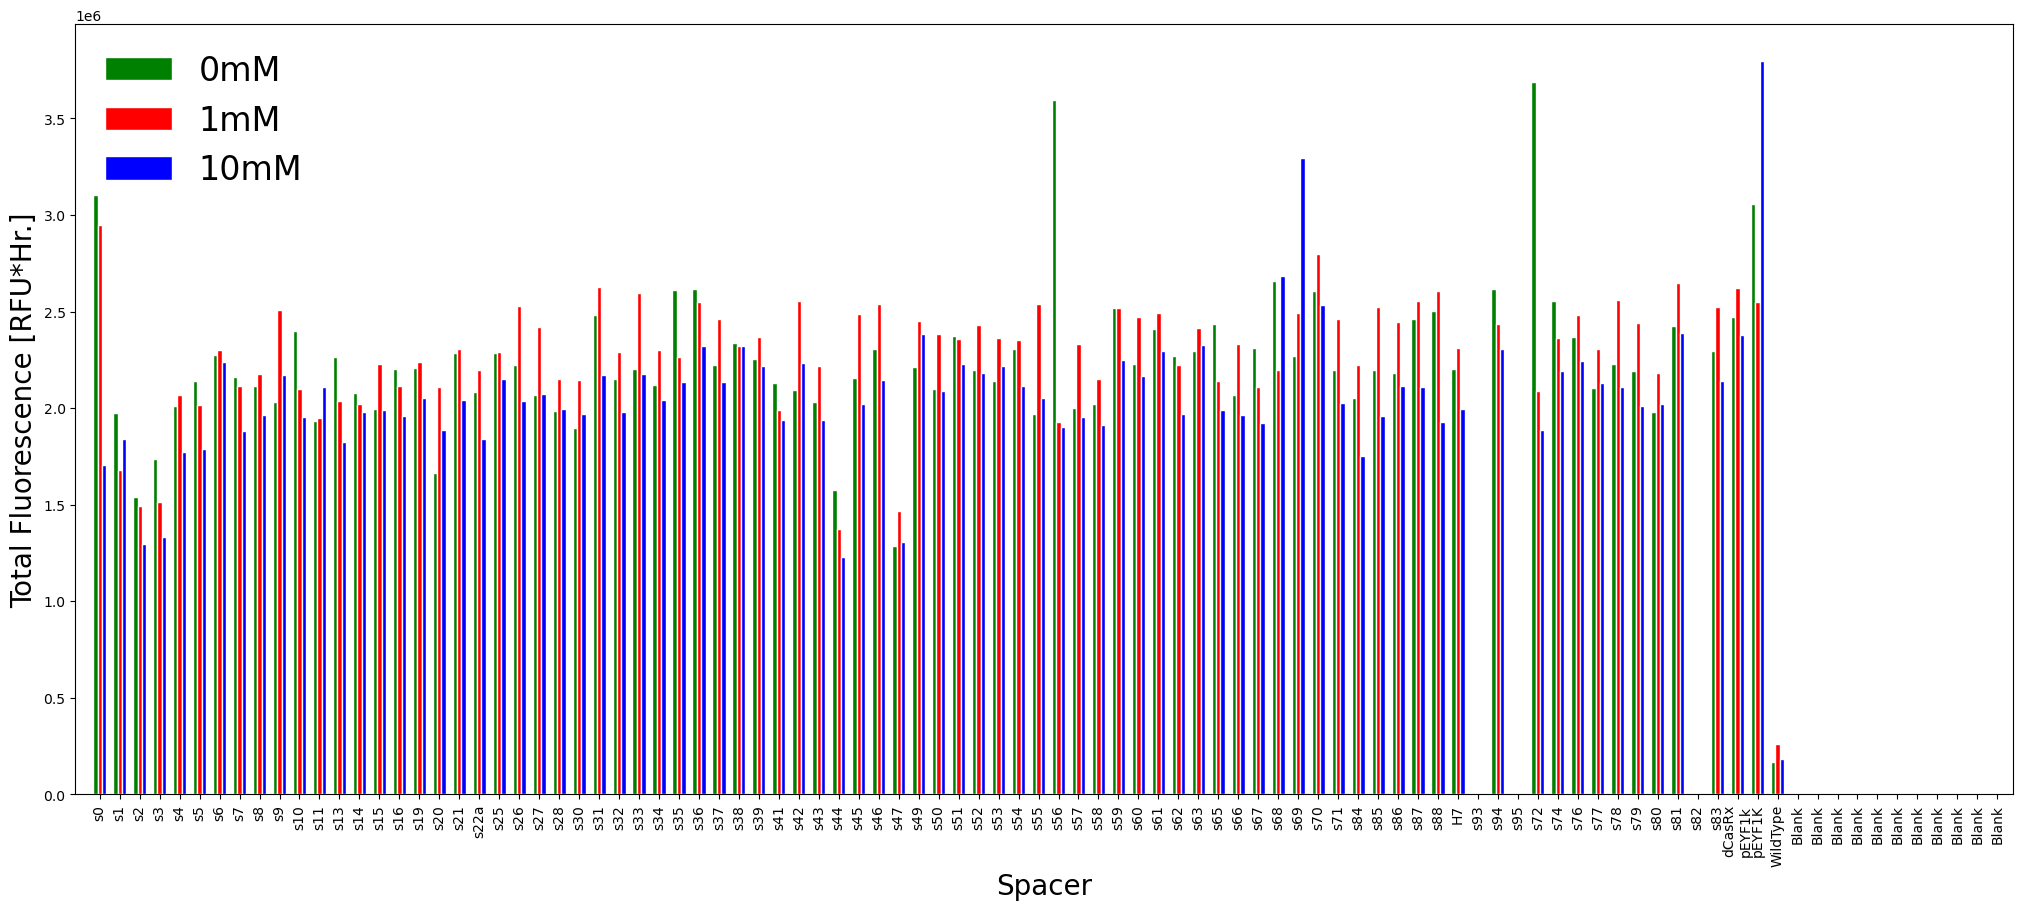

In [16]:

fig, ax = plt.subplots(figsize=(25,10))


margin = 2
 
# set heights of bars
bars1 = AUC[0].reshape((96))
bars2 = AUC[1].reshape((96))
bars3 = AUC[2].reshape((96))

barWidth = (25-2*margin)/len(bars1) 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
ax.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='0mM')
ax.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label='1mM')
ax.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='10mM')
 
# Add xticks on the middle of the group bars
ax.set_xlabel('Spacer', fontsize=20)
ax.set_ylabel('Total Fluorescence [RFU*Hr.]', fontsize=20)
ax.set_xticks([r + barWidth for r in range(len(bars1))], np.array(titles).reshape(96), rotation= 90, fontsize=10)
 
# Create legend & Show graphic
ax.legend(frameon=False, fontsize=24)
plt.xlim([-1,r1.size])
plt.show()

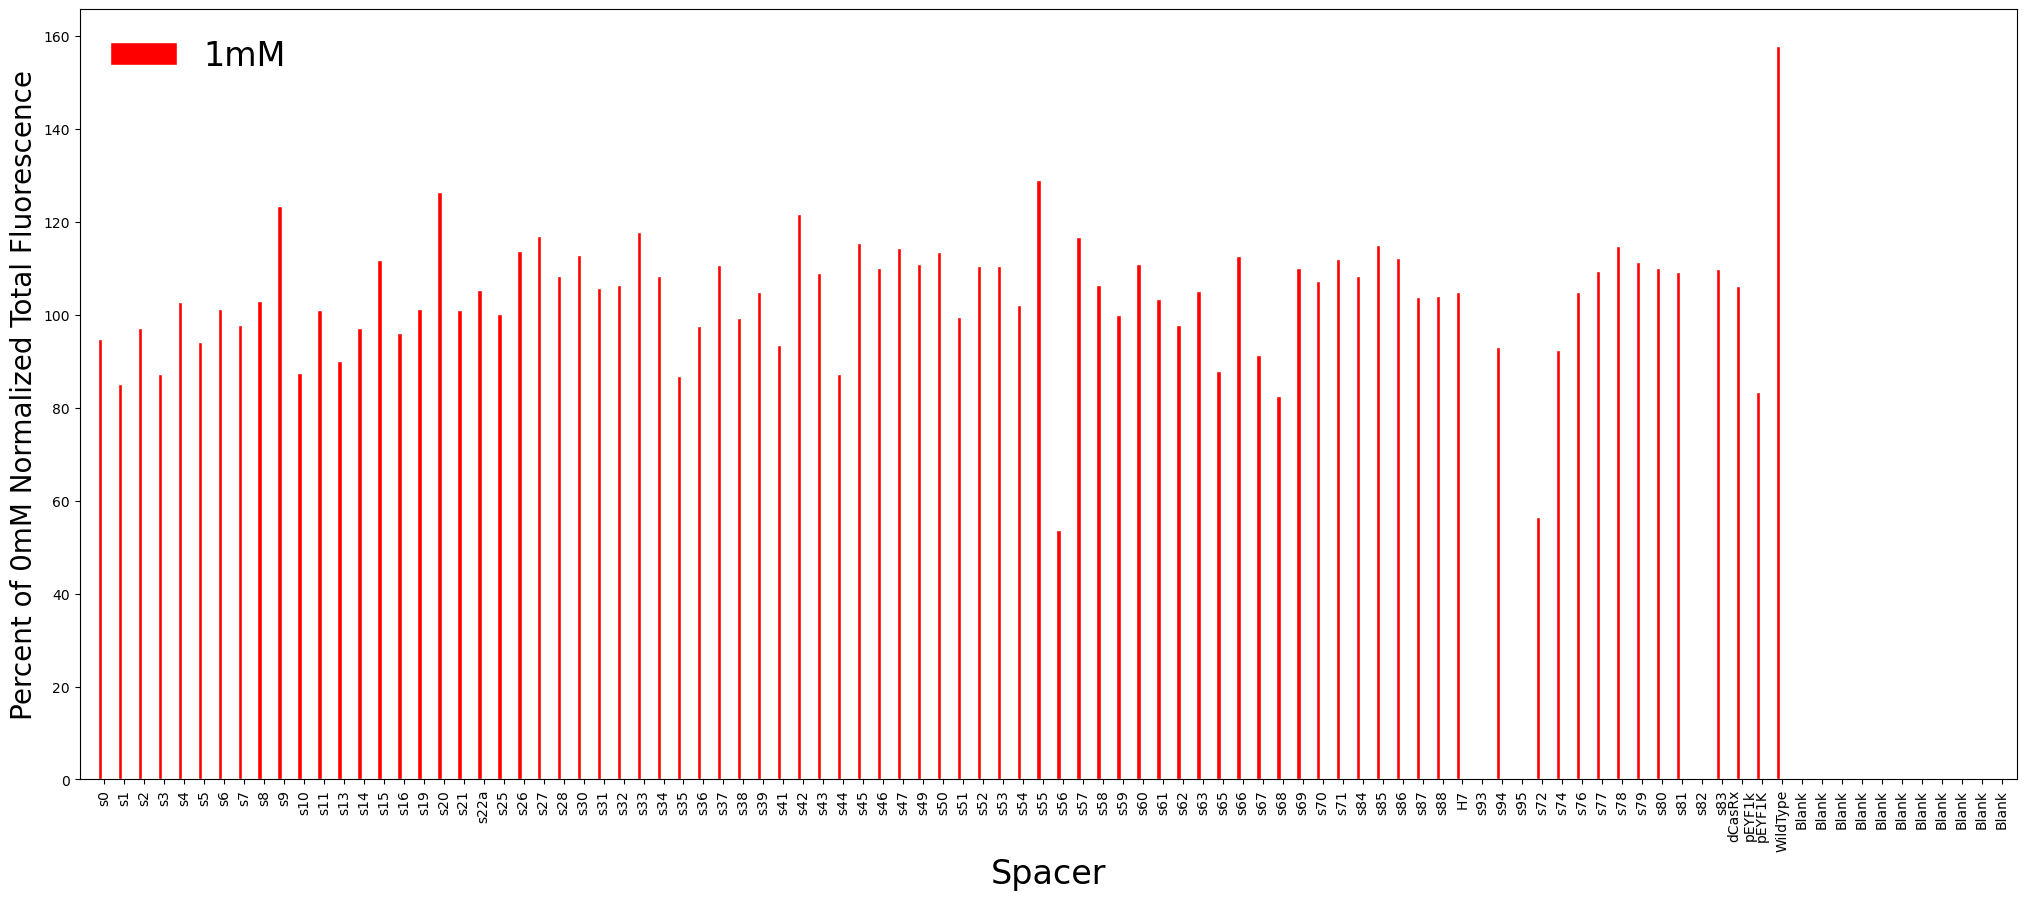

In [17]:
fig, ax = plt.subplots(figsize=(25,10))

margin = 2
 
# set heights of bars
bars1 = AUC[1].reshape((96))/AUC[0].reshape((96))*100
#bars2 = AUC[2].reshape((96))/AUC[0].reshape((96))*100

barWidth = (25-2*margin)/len(bars1) 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
#r2 = [x + barWidth for x in r1]

 
# Make the plot
ax.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='1mM')
#ax.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='10mM')

 
# Add xticks on the middle of the group bars
ax.set_xlabel('Spacer', fontsize=24)
ax.set_ylabel('Percent of 0mM Normalized Total Fluorescence', fontsize=20)
ax.set_xticks([r + barWidth for r in range(len(bars1))], np.array(titles).reshape(96), rotation=90, fontsize=10)
 
# Create legend & Show graphic
ax.legend(frameon=False, fontsize=24)
plt.xlim([-1,r1.size])
plt.show()

In [18]:
PerChange_df = pd.DataFrame(columns=['PC1mM', 'PC10mM'])

PerChange_df['PC1mM'] = bars1
PerChange_df['PC10mM'] = bars2
PerChange_df.index = np.array(titles).reshape(96)

In [19]:
High1mM = PerChange_df['PC1mM'].nlargest(n=5).index.to_list()
High1mM

['WildType', 's55', 's20', 's9', 's42']

In [20]:
Low1mM = PerChange_df['PC1mM'].nsmallest(n=5).index.to_list()
Low1mM

['s56', 's72', 's68', 'pEYF1K', 's1']

In [21]:
High10mM = PerChange_df['PC10mM'].nlargest(n=5).index.to_list()
High10mM

['s0', 's70', 's81', 's31', 'dCasRx\npEYF1k']

In [22]:
Low10mM = PerChange_df['PC10mM'].nsmallest(n=5).index.to_list()
Low10mM

['WildType', 's44', 's47', 's2', 's3']

/usr/local/anaconda3/envs/p2x11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


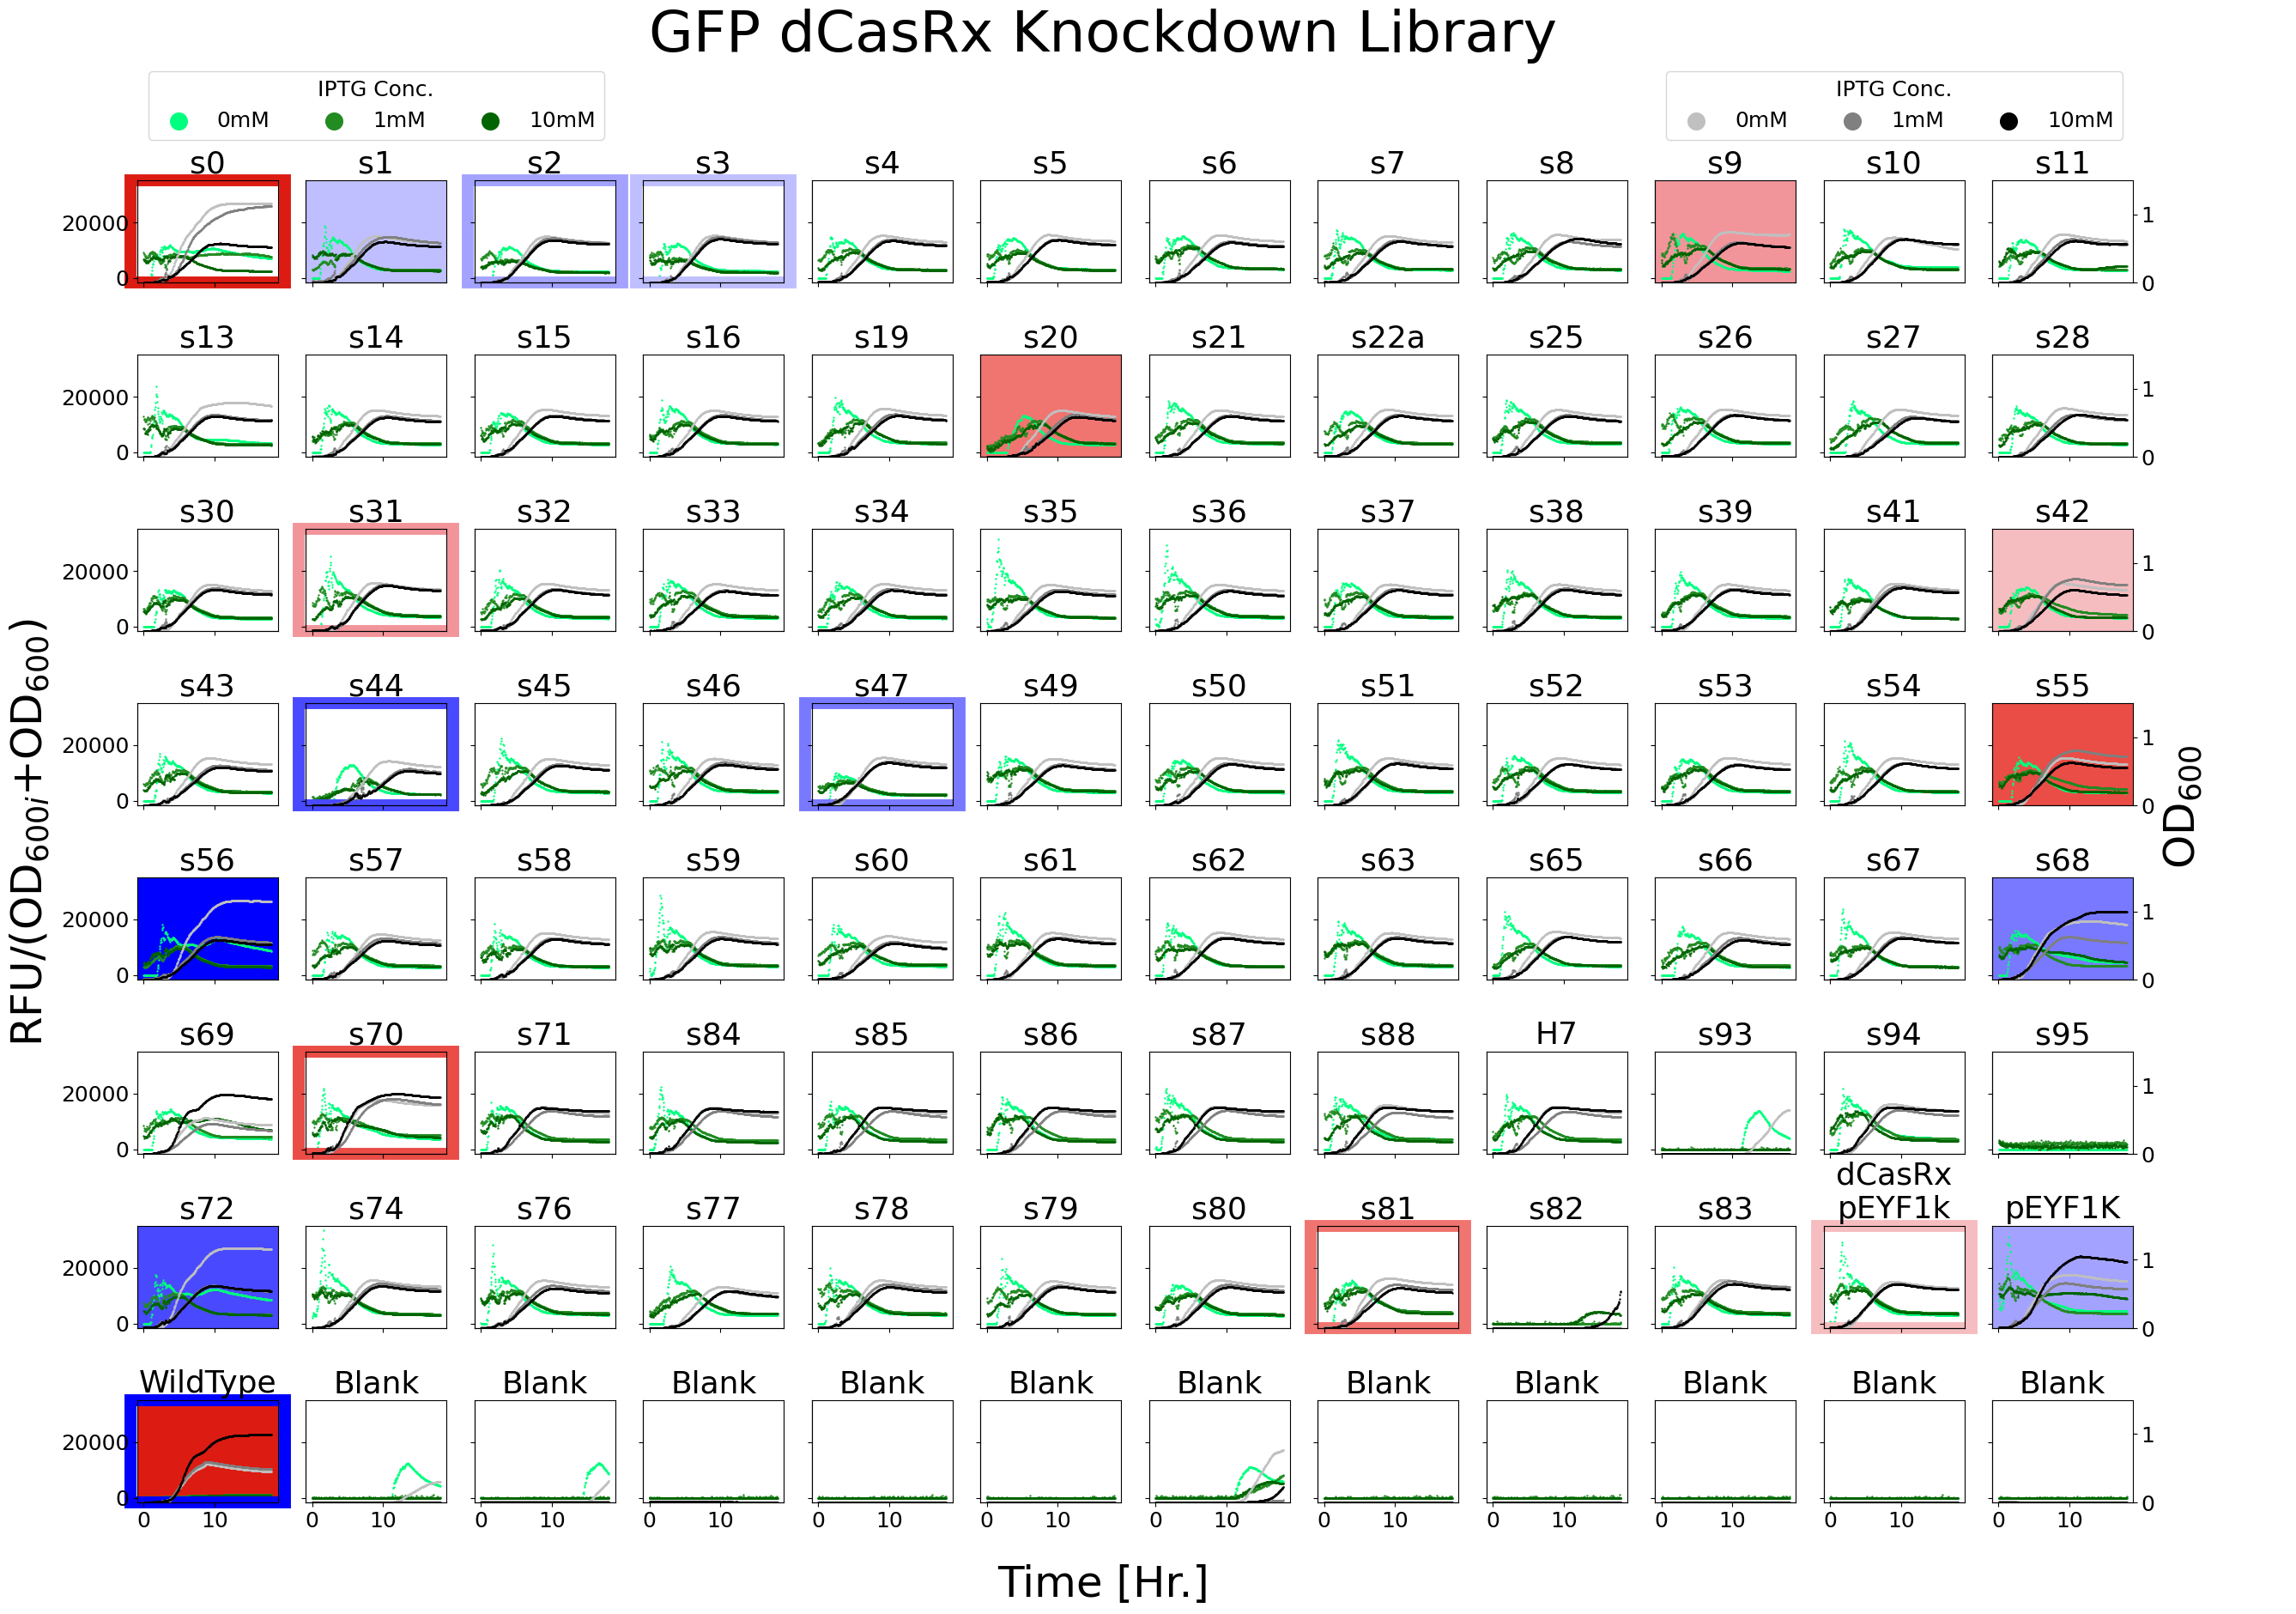

In [23]:
fig, axs = plt.subplots(8,12, sharey=True, sharex=True, figsize=(30,20), layout='tight')
face_size = 0.5
title_fsize = 48
subtitle_fsize = 26
label_fsize = 36
axis_fsize = 18
axs2_l = []

Test = False

for i in range(8):
    for j in range(12):
        axs2 = axs[i,j].twinx()
        if not Test:
            axs2.set_ylim((0,1.5))
            axs2.yaxis.set_tick_params(labelsize=axis_fsize) 
            p21 = axs2.scatter(times[0]['GFP_Normalized'], data_blanked_l[0]['600'][i,j,:], s=face_size, color='silver')
            p22 = axs2.scatter(times[1]['GFP_Normalized'], data_blanked_l[1]['600'][i,j,:], s=face_size, color='gray')
            p23 = axs2.scatter(times[2]['GFP_Normalized'], data_blanked_l[2]['600'][i,j,:], s=face_size, color='Black')
            if j != 11:
                axs2.get_yaxis().set_ticks([])
            p1 = axs[i,j].scatter(times[0]['GFP_Normalized'], data_normed_l[0]['GFP_Normalized'][i,j,:], s=face_size, label='0mM', color='springgreen')
            p2 = axs[i,j].scatter(times[1]['GFP_Normalized'], data_normed_l[1]['GFP_Normalized'][i,j,:], s=face_size, label='1mM', color='forestgreen')
            p3 = axs[i,j].scatter(times[2]['GFP_Normalized'], data_normed_l[2]['GFP_Normalized'][i,j,:], s=face_size, label='10mM', color='darkgreen')

        axs[i,j].set_title(titles[i][j], size=subtitle_fsize)
        axs[i,j].spines['right'].set_visible(False)
        axs[i,j].spines['top'].set_visible(False)
         
        axs[i,j].yaxis.set_tick_params(labelsize=axis_fsize)
        axs[i,j].xaxis.set_tick_params(labelsize=axis_fsize)  
        
        axs3 = copy.copy(axs2)
        
title_arr = np.array(titles)

# Find the indices of the elements in the array
indH1mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in High1mM]
indH10mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in High10mM]
indL1mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in Low1mM]
indL10mM = [(np.where(title_arr == element)[0][0],np.where(title_arr == element)[1][0])  for element in Low10mM]

high_colors = ['#DC1C13', '#EA4C46', '#F07470', '#F1959B', '#F6BDC0']
low_colors = ['#0000FF', '#4949FF', '#7879FF', '#A3A3FF', '#BFBFFF']

for i in range(5):
    axs[indH1mM[i][0], indH1mM[i][1]].set_facecolor(high_colors[i])
    axs[indL1mM[i][0], indL1mM[i][1]].set_facecolor(low_colors[i])
    
a=1
for i in range(5):
    axH = axs[indH10mM[i][0], indH10mM[i][1]].axis()
    axL = axs[indL10mM[i][0], indL10mM[i][1]].axis()
    recH = plt.Rectangle((axH[0]-a, axH[2]-a), (axH[1]-axH[0])+2*a, (axH[3]-axH[2])+2*a, edgecolor=high_colors[i], fill=False, lw=10, linestyle='-')
    recL = plt.Rectangle((axL[0]-a, axL[2]-a), (axL[1]-axL[0])+2*a, (axL[3]-axL[2])+2*a, edgecolor=low_colors[i], fill=False, lw=10, linestyle='-')
    recH = axs[indH10mM[i][0], indH10mM[i][1]].add_patch(recH)
    recL = axs[indL10mM[i][0], indL10mM[i][1]].add_patch(recL)
    recH.set_clip_on(False)
    recL.set_clip_on(False)
    
plt.subplots_adjust(hspace=0.7)

if Test:
    p1 = mpatches.Patch(color='red', label='The red data')
    p2 = mpatches.Patch(color='red', label='The red data')
    p3 = mpatches.Patch(color='red', label='The red data')
    p21 = mpatches.Patch(color='red', label='The red data')
    p22 = mpatches.Patch(color='red', label='The red data')
    p23 = mpatches.Patch(color='red', label='The red data') 
           
fig.suptitle('GFP dCasRx Knockdown Library', size=title_fsize)
fig.supxlabel('Time [Hr.]', size=label_fsize, y = 0.05)
fig.supylabel('RFU/(OD$_{600i}$+OD$_{600}}$)', size=label_fsize, x=0.075)
secondylabel = plt.annotate('OD$_{600}$', xy=(0.96, 0.5), xycoords=fig, size=label_fsize, ha='right', va='center', rotation=90)
fig.legend([p1,p2,p3], ['0mM', '1mM', '10mM'], loc='outside upper left', bbox_to_anchor=(0.125,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
fig.legend([p21,p22,p23], ['0mM', '1mM', '10mM'], loc='outside upper right', bbox_to_anchor=(0.90,0.95), title='IPTG Conc.',fontsize=axis_fsize, title_fontsize=axis_fsize, markerscale=20, ncol=3)
plt.show()

Text(0, 0.5, 'Count')

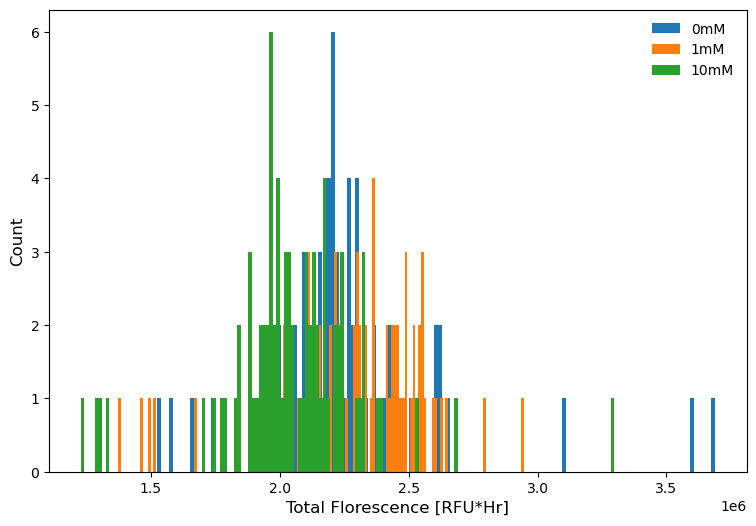

In [24]:
# I lets see how the distribution of AUC changes.
flatAUC = [data.flatten() for data in AUC]
conc = ['0mM', '1mM', '10mM']

fig, ax = plt.subplots(figsize=(9,6))
for data in flatAUC:
    ax.hist(data[:81], bins=150, histtype='barstacked')
ax.legend(conc, frameon=False)

ax.set_xlabel('Total Florescence [RFU*Hr]', fontsize=12)
ax.set_ylabel('Count',fontsize=12)

Text(0, 0.5, 'Count')

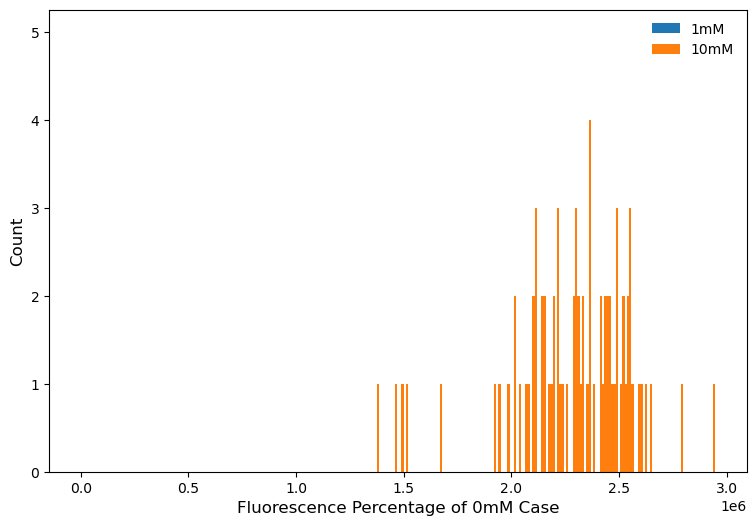

In [25]:
# Lets look at the distribution change of the percentage of 0mM Flourescence
flatPercent = [data.flatten() for data in [bars1, bars2]]
conc = ['1mM', '10mM']
fig, ax = plt.subplots(figsize=(9,6))
for data in flatPercent:
    ax.hist(data[:81], bins=150, histtype='barstacked')
ax.legend(conc, frameon=False)

ax.set_xlabel('Fluorescence Percentage of 0mM Case', fontsize=12)
ax.set_ylabel('Count', fontsize=12)